# Modelling Wind Speed and Direction Distribution using Gaussain Mixture Modles (OEN method)

OEN Method: Harris, Cook
The parent wind speed distribution: Why Weibull?
http://www.sciencedirect.com/science/article/pii/S0167610514001056

Gaussian Mixture Modles, 
http://scikit-learn.org/stable/modules/mixture.html

# 1. Set up

## 1.1 Environment

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from __future__ import division
from import_file import *
load_libs()

## 1.2 Read Data

In [2]:
# ipath= './data/NCDC/uk/boscombe_down/dat.txt' # weird shape at 3, maybe 4
# ipath= './data/NCDC/uk/middle_wallop/dat.txt'
# ipath= './data/NCDC/uk/southhamption/dat.txt'
# ipath= './data/NCDC/uk/bournemouth/dat.txt'
# ipath= './data/NCDC/tiree.txt'
ipath= "./data/NCDC/marham.txt"
# ipath= "./data/NCDC/uk/holbeach/dat.txt"
# ipath= "./data/NCDC/uk/weybourne/dat.txt"
# ipath= "./data/NCDC/uk/cambridge/dat.txt"
# ipath= "./data/NCDC/uk/wattisham/dat.txt"
# ipath= "./data/NCDC/uk/lakenheath/dat.txt" # irregular sampling time
# ipath= "./data/NCDC/uk/mildenhall/dat.txt" # irregular sampling time

# ipath= "./data/NCDC/southeast_asia/paya_lebar/dat.txt" # recent 5 year maybe corrupted
# ipath= "./data/NCDC/southeast_asia/sultan_ismail/dat.txt" # high initial data
# ipath= "./data/NCDC/southeast_asia/singapore_changi/dat.txt" # corrupted
# ipath= "./data/NCDC/east_asia/cheongju_intl/dat.txt"
# ipath= "./data/NCDC/east_asia/daegu_ab/dat.txt" # recent 5 year data is corrupted

# ipath= "./data/NCDC/canada/melita_man/dat.txt" 
# ipath= "./data/NCDC/canada/manouane_est_que/dat.txt"  
# ipath= "./data/NCDC/canada/st_johns_intl/dat.txt" # lack 2011-12
# ipath= "./data/NCDC/canada/mildred_lake_alta/dat.txt"  # uptail wind speed 
# ipath= "./data/NCDC/canada/fort_smith/dat.txt" # hard to fit
# ipath= "./data/NCDC/canada/havre_st_pierre/dat.txt" # truncate, irregular sample time
# ipath= "./data/NCDC/canada/moosonee_awos/dat.txt" # truncate, irregular sample time
# ipath= "./data/NCDC/canada/hay_rivier_a/dat.txt" # truncate
# ipath= "./data/NCDC/canada/gander_intl/dat.txt" # truancate dataset, try 4, lack of 2011-12
# ipath= "./data/NCDC/canada/tukialik_bay/dat.txt" # truncate, time shift
# ipath= "./data/NCDC/canada/lac_benoit_que/dat.txt" # has 0 speed records
# ipath= "./data/NCDC/canada/blank_sablon/dat.txt" # truncate
# ipath= "./data/NCDC/canada/argentia/dat.txt" # weird shape
# ipath= "./data/NCDC/canada/longue_pointe/dat.txt" # data may have problem, weird direction distribution

# ipath= "./data/NCDC/europe/avord/dat.txt" # try 4
# ipath= './data/NCDC/europe/ciampino/dat.txt' # try 4, wathc for KDE bandwidth
# ipath= "./data/NCDC/europe/holzdorf/dat.txt"
# ipath= "./data/NCDC/europe/neuburg/dat.txt"
# ipath= "./data/NCDC/europe/landsberg_lech/dat.txt" # very good
# ipath= "./data/NCDC/europe/valladolid/dat.txt"
# ipath= "./data/NCDC/europe/vatry/dat.txt"  # double peak
# ipath= "./data/NCDC/europe/laupheim/dat.txt" # double peak, 4; narror ellipse
# ipath= "./data/NCDC/europe/barayas/dat.txt" # 
# ipath= "./data/NCDC/europe/huspel_aws/dat.txt"  # integer
# ipath= "./data/NCDC/europe/diepholz/dat.txt" # recent year is integer
# ipath= "./data/NCDC/europe/salamanca/dat.txt" # recent 5 year is truncate data, before is better

# ipath= "./data/NCDC/south_america/senador_petronio/dat.txt"
# ipath= "./data/NCDC/south_america/ambrosio_lv/dat.txt" # 16 sectors

# ipath= "./data/NCDC/oceania/narrandera/dat.txt" 
# ipath= "./data/NCDC/oceania/brisbane_archerfield/dat.txt" 
# ipath= "./data/NCDC/oceania/brisbane/dat.txt" # bad fit
# ipath= "./data/NCDC/oceania/auckland/dat.txt"  # Weird KDE shape

# ipath= "./data/NCDC/cn/luogang/dat.txt"  # 
# ipath= "./data/NCDC/cn/binhai/dat.txt" # recent 5 may be corrupted, before is better
# ipath= "./data/NCDC/cn/tianjing/dat.txt"  
# ipath= "./data/NCDC/cn/南京lukou/dat.txt" # could apply width/length constrain
# ipath= "./data/NCDC/cn/gushi/dat.txt" # 16 sectors, some direction deviate big
# ipath= "./data/NCDC/cn/yueyang/dat.txt" # 16 sectors, some direction deviate big
# ipath= "./data/NCDC/cn/郑州xinzheng/dat.txt" # Problematic data
# ipath= "./data/NCDC/cn/wuxu/dat.txt" # Problematic data
# ipath= "./data/NCDC/cn/广州baiyun/dat.txt" # Problematic data
# ipath= "./data/NCDC/cn/武汉tianhe/dat.txt" # Problematic data
# ipath= "./data/NCDC/cn/zhengding/dat.txt" #  Initial data weird
# ipath= "./data/NCDC/cn/wusu/dat.txt" # initial speed weird
# ipath= "./data/NCDC/cn/beijing/dat.txt"  # very bad fit

# ipath= "./data/NCDC/cn/baoan_intl/dat.txt" # 
# ipath= "./data/NCDC/cn/shanghai/hongqiao_intl/dat.txt" 
# ipath= "./data/NCDC/cn/shanghai/pudong/dat.txt"
# ipath= './data/NCDC/cn/macau/dat.txt' # not good, feels like truncate data
# ipath= "./data/NCDC/cn/hk_intl/dat.txt" # truncate dataset

## US dataset, is mostly truncate, low wind speed is not complete
# ipath= "./data/NCDC/us/sheboygan/dat.txt" # untruncate us dataset, but recent 5 year maybe corrupted
# ipath= "./data/NCDC/us/sacramento_arp/dat.txt"  
# ipath= "./data/NCDC/us/st_louis_arp/9511346969491dat.txt"  
# ipath= './data/NCDC/us/huron/3461896967321dat.txt'
# ipath= "./data/NCDC/us/baltimore/9963956959409dat.txt"
# ipath= './data/NCDC/us/kennedy/5807936958436dat.txt'
# ipath= './data/NCDC/us/newark/dat.txt'
# ipath= './data/NCDC/us/la_guardia/1057036958434dat.txt'
# ipath= "./data/NCDC/us/olympia_airport/2647036962786dat.txt" 
# ipath= "./data/NCDC/us/sidney/6062326959357dat.txt" 
# ipath= "./data/NCDC/us/general_mitchell_intl/dat.txt"
# ipath= "./data/NCDC/us/quad_city_arp/dat.txt" 

## Problem dataset
# ipath= "./data/NCDC/canada/stony_rapids_arpt/dat.txt" # truncate data
# ipath= "./data/NCDC/canada/baker_lake/dat.txt" # wrong data
# ipath= "./data/NCDC/canada/rankin_inlet/dat.txt" # wrong data
# ipath= "./data/NCDC/canada/deer_lake_a/dat.txt" # bad dataset
# ipath= './data/NCDC/europe/tenerife_sur/dat.txt'  # recent year speed wired
# ipath= "./data/NCDC/south_america/carlos_ibanez/dat.txt" # bad dataset, direction
# ipath= "./data/NCDC/south_america/rio_cuarto/dat.txt"  # bad dataset
# ipath= "./data/NCDC/south_america/senador_nilo/dat.txt" # bad dataset, direction 
# ipath= "./data/NCDC/cn/长沙huanghua/dat.txt" # direction may not be real
# ipath= "./data/NCDC/dr_ambedkar_intl/dat.txt" # Wrong data

# ipath= "./data/cn_database/广州.txt" 
# ipath= "./data/cn_database/北京.txt" 

uipath = unicode(ipath , "utf8")

if not "cn_database" in ipath: 
    df = pd.read_csv(uipath,header=0, skipinitialspace=True)
    df.rename(columns={'Date':'date','Dir':'dir','Spd':'speed','Type':'type'}, inplace=True)
    df = df[['date','HrMn','type','dir','speed' ]]
else:
    df = read_cn_database(uipath)

In [3]:
df = df.query("(dir < 999) & (speed < 999) & \
              (date >= 19800000) & (date < 20160000) ")
df.index= df['date']

In [4]:
# Turn dir into [0,360), some station are[10,360],some are [0,350]
df['dir'] = df['dir'].apply(lambda x: x%360) 
df['dir_windrose'] = df['dir']
# Convert windrose coordianates to Polar Cooridinates 
df['dir'] = df['dir'].apply(lambda x: (90 - x)%360)
df.describe()

,date,HrMn,dir,speed,dir_windrose
count,4.508370e+05,450837.000000,450837.000000,450837.000000,450837.000000
mean,1.999922e+07,1168.277794,190.979658,4.741327,184.894217
std,1.013837e+05,687.409454,93.488902,2.700172,93.930931
min,1.980010e+07,0.000000,0.000000,0.500000,0.000000
25%,1.991071e+07,600.000000,120.000000,2.600000,120.000000
50%,2.002020e+07,1200.000000,210.000000,4.100000,200.000000
75%,2.009031e+07,1750.000000,260.000000,6.200000,250.000000
max,2.015080e+07,2355.000000,350.000000,28.000000,350.000000


True


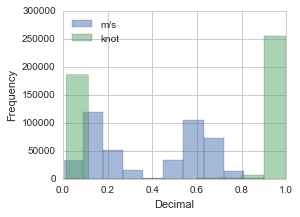

In [5]:
# Detect data stored in knot or m/s
## For data stored originally in knot, the data would cluster at 0.1 and 0.9
df['decimal'] = df.speed % 1 
df.decimal.hist(alpha=0.5, label='m/s', figsize=(4,3))
knot_unit = True if len(df.query('decimal >= 0.2'))/len(df) > 0.3 else False

# Using unit in knot instead of m/s
if knot_unit:
    df['speed']=df['speed']*1.943845
    df['decimal'] = df.speed % 1 
    df.decimal.hist(alpha=0.5,label='knot')
    # need more elaboration, some is not near an integer
    df['speed']=df['speed'].apply(lambda x: int(round(x)))
    plt_configure('Decimal','Frequency')
    plt.legend(loc='best')

print knot_unit

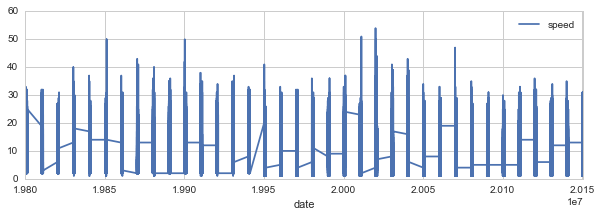

In [6]:
df['speed'].plot(legend=True,figsize=(10,3), grid=True)

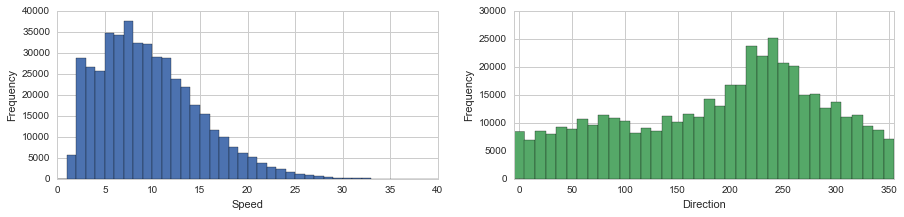

In [7]:
# Notice the gap of the distributions, so futher process needed, as below
plot_speed_and_angle_distribution(df.speed, df.dir)

## 1.3 Data Wrangling

### 1.3.1 Artefacts handling

#### 1.3.1.1 wrong direction record

In [8]:
display(df.query('dir % 10 >= 0.1'))
df = df.query('dir % 10 <= 0.1')

,date,HrMn,type,dir,speed,dir_windrose,decimal
date,,,,,,,
19920706,19920706,1550,FM-15,248,13,202,0.829377
19920919,19920919,850,FM-15,171,2,279,0.943845
19930516,19930516,750,FM-15,331,17,119,0.911451
20020711,20020711,1450,99999,306,3,144,0.304537


#### 1.3.1.2 sudden increase in speed

,date,HrMn,type,dir,speed,dir_windrose,decimal,incre,incre_reverse
date,,,,,,,,,
20020128,20020128,1700,FM-12,210,54,240,0.427660,26.0,27.0
20011228,20011228,1400,FM-12,170,51,280,0.539970,25.0,30.0
19851113,19851113,900,FM-12,230,50,220,0.956817,40.0,45.0
19900223,19900223,1000,SY-MT,160,50,290,0.956817,43.0,45.0
20020304,20020304,50,FM-15,50,50,40,0.956817,44.0,46.0
20070118,20070118,1300,FM-12,180,47,270,0.041049,0.0,12.0
20070118,20070118,1250,FM-15,180,47,270,0.041049,17.0,0.0
20021027,20021027,1000,FM-12,200,44,250,0.930897,10.0,32.0
20070118,20070118,1450,FM-15,180,43,270,0.958975,8.0,0.0


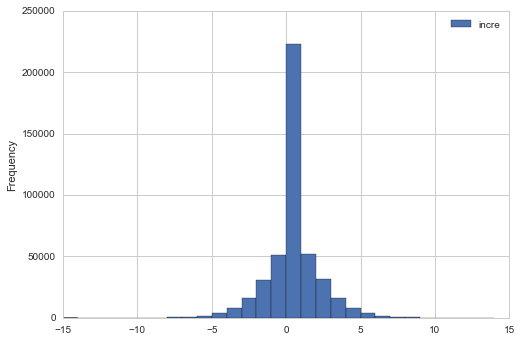

In [9]:
# sudden increse
df['incre'] = df.speed.diff(1)
df['incre'].fillna(0, inplace=True)
df['incre_reverse'] = df.speed.diff(-1)
df['incre_reverse'].fillna(0, inplace=True)

display(df.sort_values(by='speed',ascending=False).head(10))
df['incre'].plot(kind='hist', bins=arange(-15, 15), legend=True)

In [10]:
incre_threshold = 20 if knot_unit else 10
print 'sudden increase number', len(df.query('(incre > @incre_threshold )&(incre_reverse > @incre_threshold )'))
df = df.query('(incre < @incre_threshold )|(incre_reverse < @incre_threshold )')

sudden increase number 6


After Simple Aretefacts Handling

In [11]:
# Check the max speed
df.sort_values(by='speed',ascending=False).head(10)

,date,HrMn,type,dir,speed,dir_windrose,decimal,incre,incre_reverse
date,,,,,,,,,
20070118,20070118,1250,FM-15,180,47,270,0.041049,17.0,0.0
20070118,20070118,1300,FM-12,180,47,270,0.041049,0.0,12.0
20021027,20021027,1000,FM-12,200,44,250,0.930897,10.0,32.0
19900226,19900226,700,FM-12,220,43,230,0.958975,9.0,18.0
19870327,19870327,1400,SY-MT,230,43,220,0.958975,7.0,3.0
20040320,20040320,1600,FM-12,200,43,250,0.958975,3.0,8.0
20070118,20070118,1450,FM-15,180,43,270,0.958975,8.0,0.0
20070118,20070118,1500,FM-12,180,43,270,0.958975,0.0,3.0
19900125,19900125,1650,FM-15,200,42,250,0.987052,3.0,0.0


#### 1.3.1.3 re-distribute angle, for un-evenly sectored data
For some dataset, the 16 sectors are not record properly,

e.g. the sectors are [0,20,30,50], need to redistribute the angle into 22.5

In [12]:
df['dir'].value_counts().sort_index()

0       8471
10      6951
20      8510
30      8007
40      9220
50      8981
60     10744
70      9572
80     11437
90     10935
100    10442
110     8127
120     9174
130     8510
140    11190
150    10115
160    11633
170    11132
180    14326
190    13020
200    16860
210    16740
220    23871
230    22043
240    25188
250    20721
260    20177
270    14972
280    15273
290    12771
300    13760
310    11060
320    11465
330     9422
340     8789
350     7216
Name: dir, dtype: int64

In [13]:
effective_column = df['dir'].value_counts()[df['dir'].value_counts() > 30].sort_index()

if len(effective_column) == 16:
    # For some dataset, the angle is not evenly distributed, so there is a need to redistribute
    original_angle = list(effective_column.sort_index().index)
    redistributed_angle = linspace(0,360,num=17)[:-1]
    df['dir'].replace(to_replace=original_angle, value=redistributed_angle, inplace=True)
    display(df['dir'].value_counts().sort_index())

SECTOR_LENGTH = 360/len(effective_column)
print len(effective_column), SECTOR_LENGTH

36 10.0


### 1.3.2 Sampling Type Selection

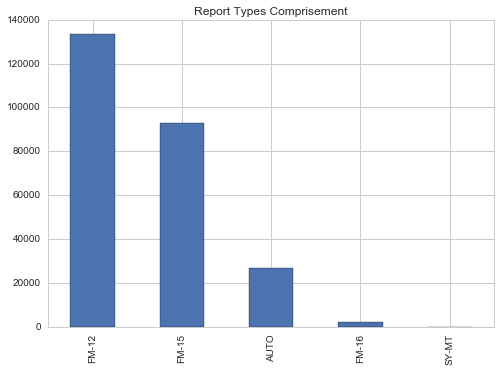

In [14]:
sample_type = df.query('date > 20000000')['type']
sample_type.value_counts().plot(
    kind = 'bar', title = 'Report Types Comprisement')

report_type_most_used = sample_type.value_counts().argmax()
df = df.query("type==@report_type_most_used")

### 1.3.3 Sampling Time Selection

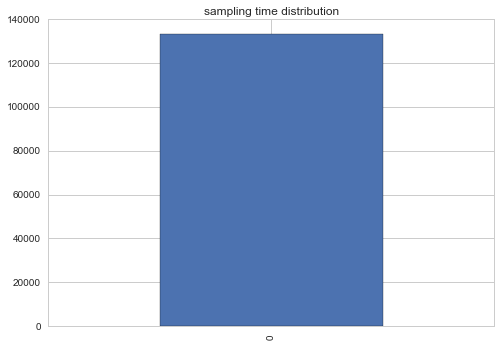

In [15]:
df['sample_time'] = df.HrMn % 100 
sample_time = df.query('date > 20000000')['sample_time']
sample_time.value_counts().plot(
    kind = 'bar', title = 'sampling time distribution')

sampling_time_most_used = sample_time.value_counts().argmax()
df = df.query("sample_time==@sampling_time_most_used")
df.drop(['sample_time'], 1,inplace=True)

In [16]:
df['HrMn'].value_counts().sort_index()

0       10118
100     10342
200     10311
300     10226
400     10304
500     10267
600     10108
700     10404
800     10464
900     10376
1000    10514
1100    10548
1200    10278
1300    10575
1400    10556
1500    10434
1600    10563
1700    10608
1800    10351
1900    10638
2000    10627
2100    10504
2200    10594
2300    10473
Name: HrMn, dtype: int64

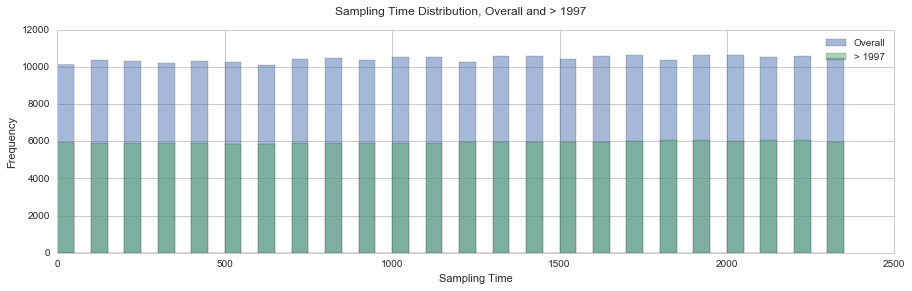

In [17]:
MID_YEAR = (min(df.date)//10000+max(df.date)//10000)//2
bins=arange(min(df.HrMn), max(df.HrMn) + 100, 50)

df['HrMn'].plot(
    kind='hist', alpha=0.5,figsize=(15, 4),bins=bins, label='Overall')

df.query('date > @MID_YEAR * 10000')['HrMn'].plot(
    kind='hist', alpha=0.5,figsize=(15, 4),bins=bins, label='> %s' %  MID_YEAR )

plt_configure(xlabel='Sampling Time', ylabel='Frequency', legend='best',
             title = 'Sampling Time Distribution, Overall and > %s ' %  MID_YEAR)

### 1.3.4 Re-distribute Direction and Speed
e.g. Dir 50 -> -45 ~ 55, to make KDE result better

In [18]:
DIR_REDISTRIBUTE = 'even'
if DIR_REDISTRIBUTE == 'even':
    DIR_BIN = arange(-5, 360, 10) 
elif DIR_REDISTRIBUTE == 'round_up':
    DIR_BIN = arange(0, 360+10, 10) 

def randomize_angle(df, sector_length = 10):
    if DIR_REDISTRIBUTE == 'even':
        df['dir_ran'] = df['dir'].apply(lambda x: (x + np.random.uniform(-sector_length/2,sector_length/2)))
    else:
        df['dir_ran'] = df['dir'].apply(lambda x: (x + np.random.uniform(0,sector_length)))

    bins=arange(0, 360+10, 5)
    df['dir'].hist(bins=bins, alpha=0.5, label='Original Data')
    bins=arange(0, 360+10, 1)
    df['dir_ran'].hist(bins=bins, alpha=0.5,figsize=(15, 4), label='Redistributed Data')
    plt_configure(xlabel="Direction", ylabel="Frequency", legend=True)
    plt.autoscale(enable=True, axis='x', tight=True)
    
    df['dir']=df['dir_ran']
    df.drop(['dir_ran'], 1,inplace=True)
    return df

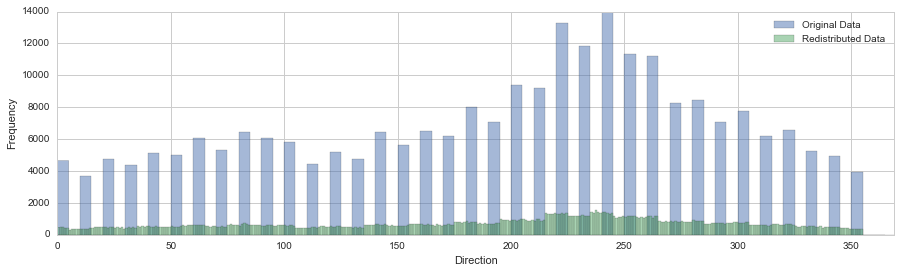

In [19]:
# Randomize the angle degree, to form a better KDE estimation
df = randomize_angle(df, SECTOR_LENGTH)

In [20]:
def randomize_speed(df):
    # Round down speed, need more caution
    if len(df.query('speed < 1')) > 200:
        # if has zero data
        df['speed_ran'] = df['speed'].apply(lambda x: (x + np.random.uniform(0,1)))
    else:
        # if lack zero
        df['speed_ran'] = df['speed'].apply(lambda x: (x + np.random.uniform(-1,0)) if x > 0 else x)

    max_speed = df.speed.max()
    df['speed'].hist(bins=arange(0, max_speed), alpha=0.5, label='Original Data')
    df['speed_ran'].hist(bins=arange(0, max_speed, 0.5), alpha=0.5,figsize=(15, 4), label='Redistributed Data')
    plt_configure(xlabel="Speed", ylabel="Frequency", legend=True)
    
    df['speed']=df['speed_ran']
    df.drop(['speed_ran'], 1,inplace=True)
    return df

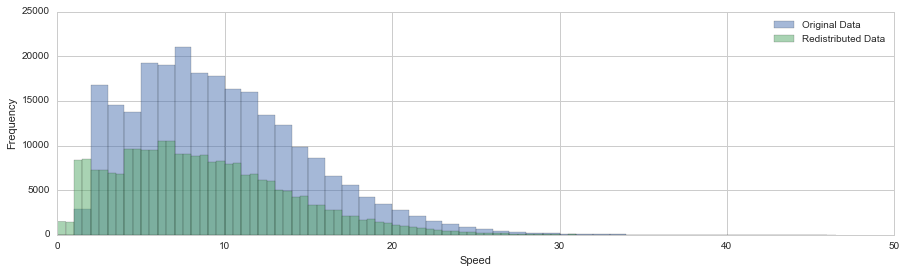

In [21]:
# Each original cell is split between the value, # so the peak is shift left
# e.g. 2 -> (1.5,2), (2,2.5); or 3 -> (2,3)
df = randomize_speed(df)

### 1.3.5 Generate (x,y) from (speed,dir)

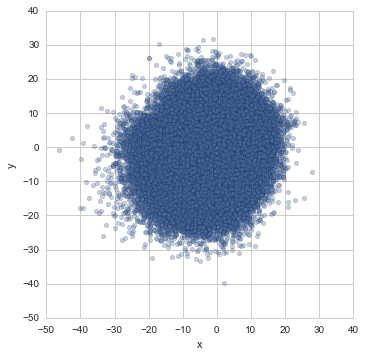

In [22]:
df['x'] = df['speed'] * cos(df['dir'] * pi / 180.0)
df['y'] = df['speed'] * sin(df['dir'] * pi / 180.0)
fig, ax = plt.subplots()
ax.set_aspect('equal')
df.plot(kind='scatter', x='x', y='y', alpha=0.35, ax=ax)

## 1.4 Time Shift Comparison

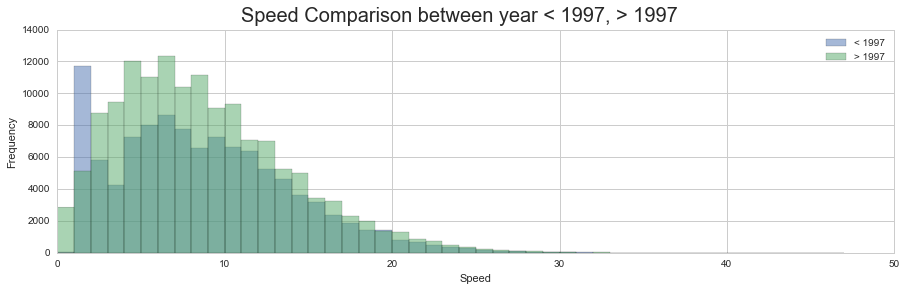

In [23]:
# Comparison between mid_year, looking for: 
# 1. Odd Even Bias
# 2. Time Shift of Wind Speed Distribution
bins = arange(0, max(df.speed) + 1)
df.query('date < @MID_YEAR * 10000')['speed'].plot(
    kind='hist', alpha=0.5,figsize=(15, 4),bins=bins, label='< %s' % MID_YEAR)

df.query('date > @MID_YEAR * 10000')['speed'].plot(
    kind='hist', alpha=0.5,figsize=(15, 4),bins=bins, label='> %s' % MID_YEAR)

plt.suptitle('Speed Comparison between year < %s, > %s ' % (MID_YEAR, MID_YEAR), fontsize = 20)
plt_configure(xlabel='Speed', ylabel='Frequency', legend=True)

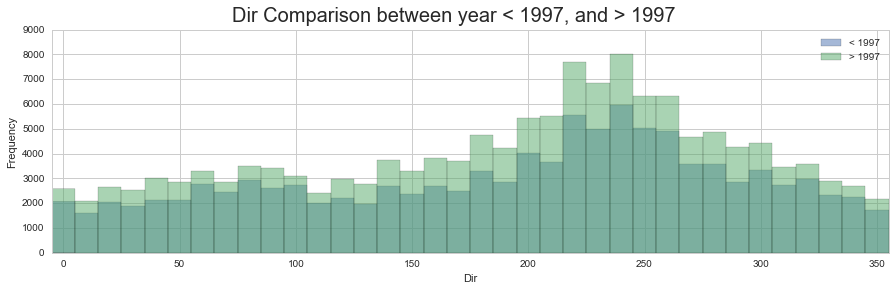

In [24]:
df.query('date < @MID_YEAR * 10000')['dir'].plot(
    kind='hist', alpha=0.5,bins=DIR_BIN, label='< %s' % MID_YEAR)

df.query('date > @MID_YEAR * 10000')['dir'].plot(
    kind='hist', alpha=0.5,figsize=(15, 4),bins=DIR_BIN, label='> %s' % MID_YEAR)

plt.suptitle('Dir Comparison between year < %s, and > %s ' % (MID_YEAR, MID_YEAR), fontsize = 20)
plt_configure(xlabel='Dir', ylabel='Frequency', legend=True)
plt.autoscale(enable=True, axis='x', tight=True)

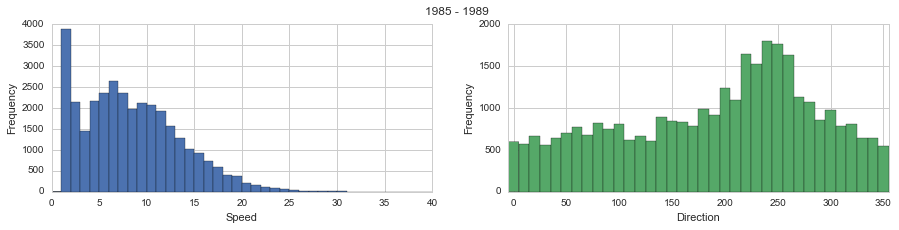

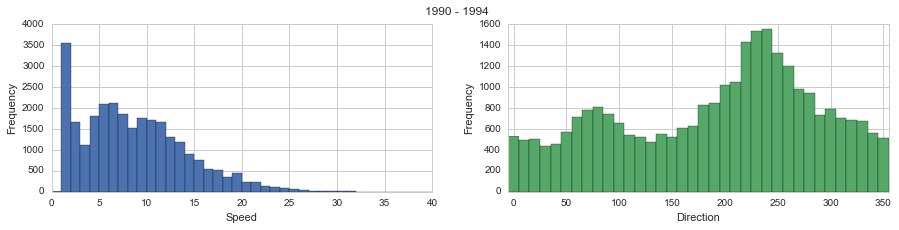

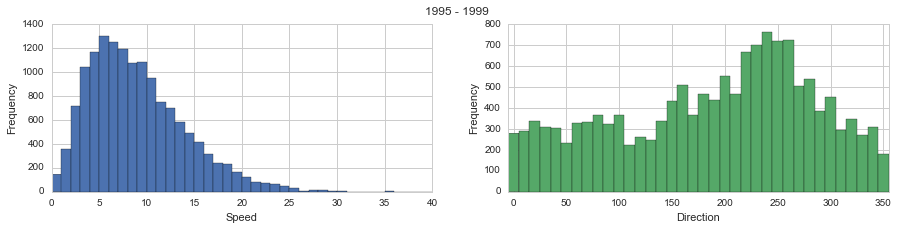

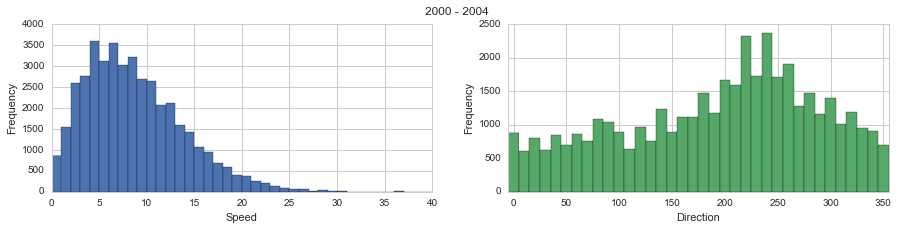

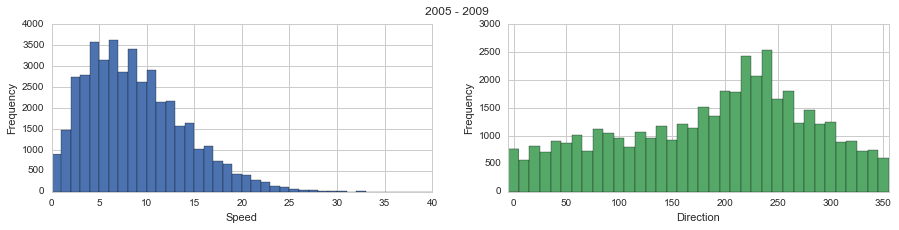

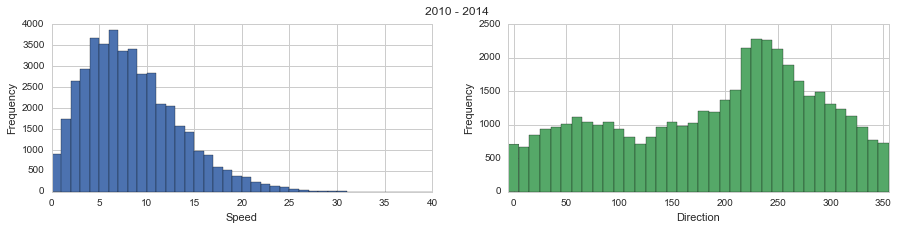

In [25]:
# Inspect the time shift of speed and degree distribution, and odd-even bias
def check_time_shift(df):
    for start_time in xrange(19850000, 20150000, 50000):
        end_time = start_time + 50000 
        sub_df = df.query('(date >= @start_time) & (date < @end_time)')
        if len(sub_df) > 0 :
            title = '%s - %s' %(start_time//10000, end_time//10000-1)
            plot_speed_and_angle_distribution(sub_df.speed, sub_df.dir, title)
        
check_time_shift(df)

## 1.5 Re-select data, and overview of the clean dataset

In [26]:
## Summery of the data selection
print 'incre_threshold for artefact detect:', incre_threshold
print 'Report type used:', report_type_most_used
print 'Sampling time used:', sampling_time_most_used

df_all_years = df
df = df.query('(date >= 20100000) & (date < 20150000)')
df.describe()

incre_threshold for artefact detect: 20
Report type used: FM-12
Sampling time used: 0


,date,HrMn,dir,speed,dir_windrose,decimal,incre,incre_reverse,x,y
count,4.340700e+04,43407.000000,43407.000000,43407.000000,43407.000000,43407.000000,43407.000000,43407.000000,43407.000000,43407.000000
mean,2.012065e+07,1151.265925,191.533462,8.473183,180.880503,0.555982,-0.000323,-0.002373,-1.644109,-1.924224
std,1.413796e+04,692.052220,95.140338,4.994322,93.708645,0.448161,0.162060,2.086696,6.410758,7.016840
min,2.010010e+07,0.000000,-4.984329,0.000624,0.000000,0.017288,-7.000000,-18.000000,-33.780035,-33.238459
25%,2.011040e+07,600.000000,112.086436,4.711483,120.000000,0.053997,0.000000,-1.000000,-5.809791,-6.451354
50%,2.012063e+07,1200.000000,213.209338,7.712389,190.000000,0.913609,0.000000,0.000000,-0.916649,-1.849942
75%,2.013093e+07,1800.000000,264.367258,11.411414,250.000000,0.967607,0.000000,1.000000,2.678598,2.895712
max,2.014123e+07,2300.000000,354.978931,35.714450,350.000000,0.997842,7.000000,15.000000,20.968752,25.517867


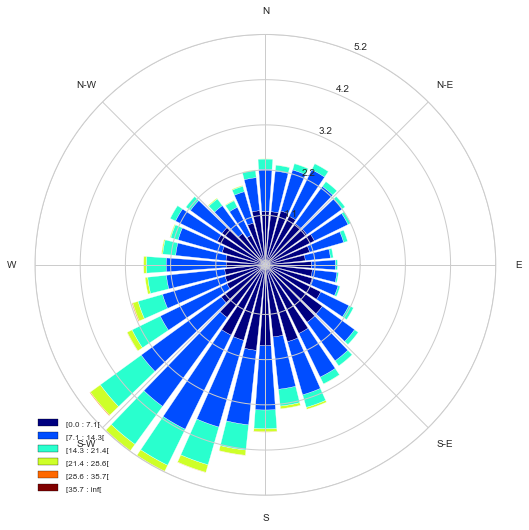

In [27]:
# 90 degree is in east
ax = WindroseAxes.from_ax()
ax.bar(df.dir_windrose, df.speed, normed=True, opening=0.8, edgecolor='white', nsector=36)
ax.set_legend()

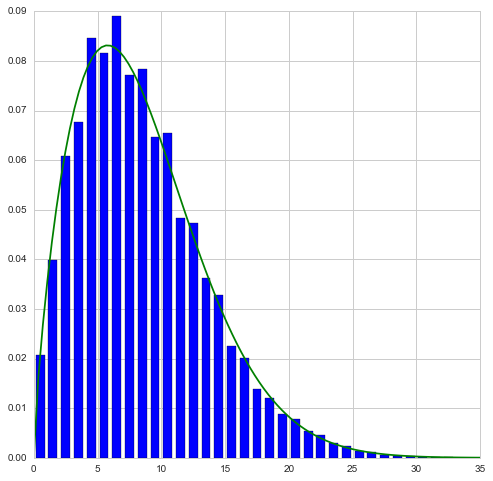

In [28]:
ax, _params = WindAxes.from_ax().pdf(df.speed, 
                                     bins=arange(0, max(df.speed)))
weibull_params = sp.stats.exponweib.fit(df.speed, floc=0, f0=1)

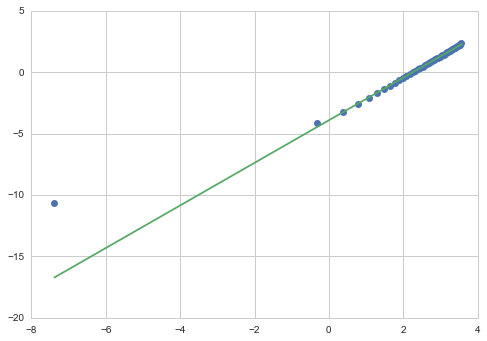

In [29]:
sample = df.speed
ecdf = sm.distributions.ECDF(sample)

x = linspace(min(sample), max(sample))
y = ecdf(x)
plt.plot(log(x), log(-log(1-y)),'o')

w_scale, c_shape = weibull_params[1], weibull_params[3]
qz=exp(-(x/c_shape)**w_scale)
plt.plot(log(x), log(-log(qz)),'-')

# 2. Create input data, i.e. speed_set

In [30]:
# speed_set = array(zip(-df.x, -df.y)) # Adjust the direction to match for Cook's paper
SPEED_SET = array(zip(df.x, df.y))
NUMBER_OF_GAUSSIAN = 3
FIT_METHOD = 'square_error'
DEFAULT_BANDWDITH = 1.5 if knot_unit else 0.7

In [31]:
FITTING_RANGE = []
fit_limit = ceil(df['speed'].quantile(.95))
fitting_axis_range = arange(-fit_limit, fit_limit+1, 1)
print fitting_axis_range

for i in fitting_axis_range:
    for j in fitting_axis_range:
        FITTING_RANGE.append([i,j])

[-18. -17. -16. -15. -14. -13. -12. -11. -10.  -9.  -8.  -7.  -6.  -5.  -4.
  -3.  -2.  -1.   0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.
  12.  13.  14.  15.  16.  17.  18.]


In [32]:
plot_limit = ceil(df['speed'].quantile(.975))
PLOT_AXIS_RANGE = arange(-plot_limit, plot_limit+1, 1)

# 3. Kernel Density Estimation

In [33]:
sample = SPEED_SET

In [34]:
# The bandwidth value sometimes would be too radical
from sklearn.grid_search import GridSearchCV

if knot_unit:
    bandwidth_range = arange(0.5,2,0.2)
else:
    bandwidth_range = arange(0.4,1,0.1)

grid = GridSearchCV(neighbors.KernelDensity(),
                    {'bandwidth': bandwidth_range},
                    n_jobs=-1, cv=4) 
grid.fit(sample)
bandwidth = grid.best_params_['bandwidth']

In [35]:
if 'bandwidth' not in globals():
    bandwidth = DEFAULT_BANDWDITH 

kde = neighbors.KernelDensity(bandwidth=bandwidth).fit(sample)

points = FITTING_RANGE
# very slow if the dataset is too large, e.g. 100,000
# kde returns log prob, need to convert it
kde_result = exp(kde.score_samples(points))
print 'bandwidth:', bandwidth, len(kde_result)
print kde_result[:5]

bandwidth: 1.5 1369
[  6.10569415e-05   8.21272667e-05   1.07007301e-04   1.31146037e-04
   1.47970808e-04]


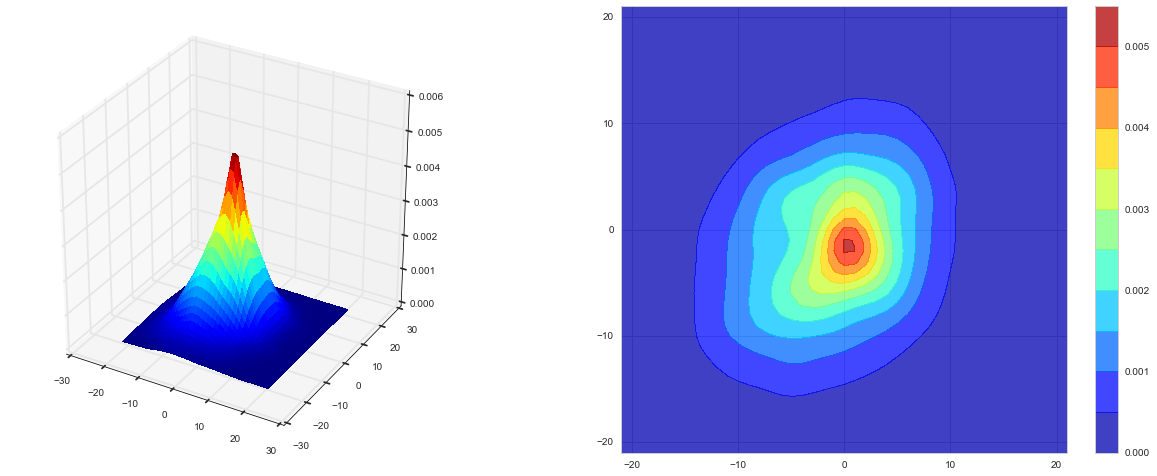

In [36]:
# Plot jPDF
X = Y = PLOT_AXIS_RANGE
# Can't work if pass as generate_Z_from_X_Y(X,Y, exp(kde.score_samples())), need to use lambda
# see http://stackoverflow.com/questions/21035437/passing-a-function-as-an-argument-in-python
kde_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(kde.score_samples(coords)))

fig = plt.figure(figsize=(22,8))
ax1 = fig.add_subplot(1,2,1, projection = '3d')
plot_3d_prob_density(X,Y,kde_Z,ax1)
ax2 = fig.add_subplot(1,2,2)
plot_2d_prob_density(X,Y,kde_Z,ax2)

In [37]:
kde_cdf = cdf_from_pdf(kde_result)

# 4. GMM by Expectation-maximization

In [38]:
sample= SPEED_SET
clf = mixture.GMM(n_components=NUMBER_OF_GAUSSIAN, covariance_type='full')
clf.fit(sample)
print clf.converged_

True


In [39]:
gmm_em_result = read_gmm_em_result(clf)
pretty_print_gmm(gmm_em_result)  

,weight,mean_x,mean_y,sig_x,sig_y,corr
1,0.365,1.169,-3.537,4.869,5.995,0.171
2,0.344,-0.326,2.630,5.435,5.707,0.061
3,0.290,-6.748,-5.295,6.215,6.820,0.105


GMM Plot Result
0.365435997459 [[ 1.16891362 -3.53727382]] [ 4.68322942  6.14100579] 160.400918056
0.344282334544 [[-0.3263383   2.62997295]] [ 5.35131801  5.7850734 ] 154.406941007
0.290281667996 [[-6.7483401  -5.29495952]] [ 6.05136235  6.96563694] 155.755773895


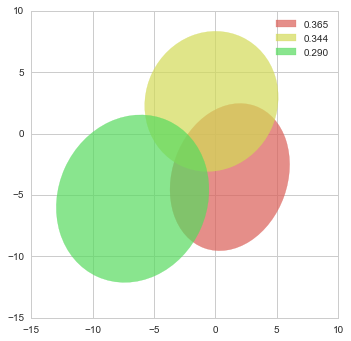

In [40]:
plot_gmm_ellipses(gmm_em_result)

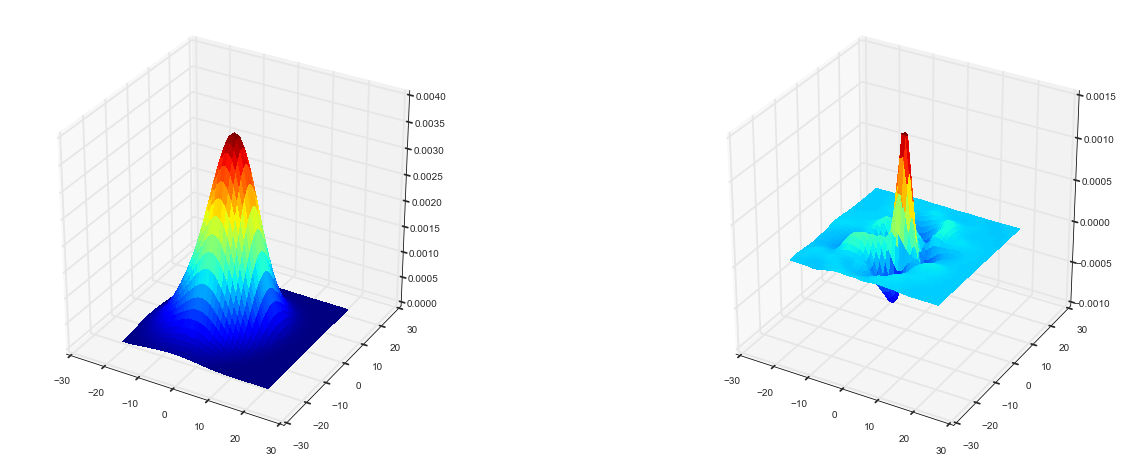

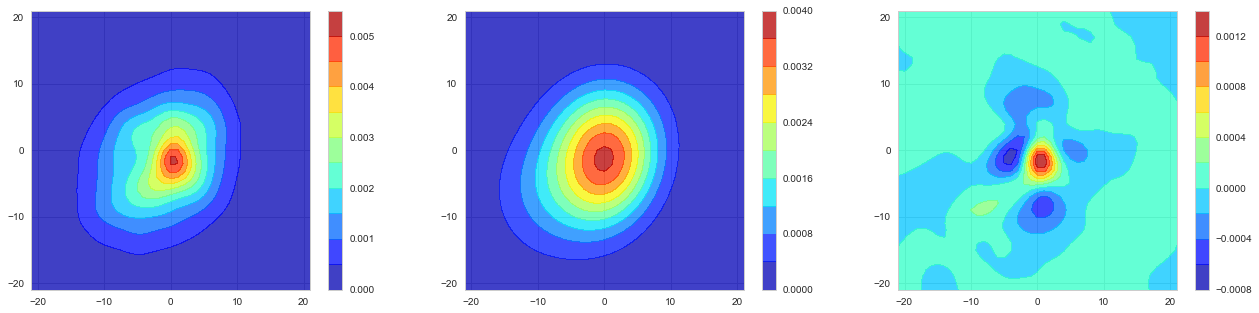

In [41]:
X = Y = PLOT_AXIS_RANGE
pdf_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(clf.score_samples(coords)[0]))

def residule_between_kde_and_gmm(points):
    kde_vals = exp(kde.score_samples(points))
    gmm_vals = exp(clf.score_samples(points)[0])
    return kde_vals - gmm_vals 

residual_Z = generate_Z_from_X_Y(X,Y, residule_between_kde_and_gmm)

fig = plt.figure(figsize=(22,8))
ax1 = fig.add_subplot(1,2,1, projection = '3d')
plot_3d_prob_density(X,Y,pdf_Z,ax1)
ax2 = fig.add_subplot(1,2,2,projection = '3d')
plot_3d_prob_density(X,Y,residual_Z,ax2)

fig = plt.figure(figsize=(22,5))
ax1 = fig.add_subplot(1,3,1)
plot_2d_prob_density(X,Y,kde_Z,ax1)
ax2 = fig.add_subplot(1,3,2)
plot_2d_prob_density(X,Y,pdf_Z,ax2)
ax3 = fig.add_subplot(1,3,3)
plot_2d_prob_density(X,Y,residual_Z,ax3)

## Goodness-of-fit Statistics

In [42]:
points = FITTING_RANGE
gmm_pdf_result = exp(clf.score_samples(points)[0])
# put into Pandas to make it looks better
pretty_pd_display([goodness_of_fit_summary(gmm_pdf_result, kde_result)])

,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.02293,0.01396,2.626820e-08,0.032082,0.227708,0.969253


# 5. GMM by Optimization

In [43]:
sample = SPEED_SET
points = FITTING_RANGE
max_speed = df.speed.max()

In [44]:
# from GMM,EM 
# GMM format: weight, meanx, meany, sigx, sigy, rho
x0 = gmm_em_result

cons = [
        # sum of every 6th element, which is the fraction of each gaussian
        {'type': 'eq', 'fun': lambda x: sum(x[::6]) - 1},
        # # limit the width/height ratio of elliplse, optional
        # {'type': 'ineq', 'fun': lambda x: width_height_ratios_set(x) - 1/3},
        # {'type': 'ineq', 'fun': lambda x: 3 - width_height_ratios_set(x)},
]

bonds = [(0., 0.99),(-fit_limit, fit_limit),(-fit_limit, fit_limit),
         (0., fit_limit),(0., fit_limit),(-0.99, 0.99)]*int(len(x0)/6)

result = sp.optimize.minimize(
    lambda x0: GMM_fit_score(x0, kde_result, points,FIT_METHOD),
    x0,
    bounds = bonds,
    constraints=cons,
    tol = 0.000000000001,
    options = {"maxiter": 500})
result

     fun: -18.888882235931753
     jac: array([  1.51248288e+00,  -2.38418579e-07,   0.00000000e+00,
         2.38418579e-07,  -2.38418579e-07,  -4.76837158e-07,
         1.51248240e+00,   2.38418579e-07,  -2.38418579e-07,
         0.00000000e+00,   0.00000000e+00,   4.76837158e-07,
         1.51248264e+00,   0.00000000e+00,  -2.38418579e-07,
         0.00000000e+00,   0.00000000e+00,  -2.38418579e-07,
         0.00000000e+00])
 message: 'Optimization terminated successfully.'
    nfev: 1296
     nit: 64
    njev: 64
  status: 0
 success: True
       x: array([ 0.45926064, -5.69967011, -3.52977705,  5.6288907 ,  7.82984469,
        0.14958926,  0.48517377,  2.04476712, -0.37769699,  4.8365003 ,
        6.70180509,  0.08942803,  0.05556559,  0.53419987, -1.89130033,
        1.75310044,  2.59726741,  0.12188472])

## 5.1 GMM Result

In [45]:
# gmm = group_gmm_param_from_gmm_param_array(gmm_em_result, sort_group = True)
gmm = group_gmm_param_from_gmm_param_array(result.x, sort_group = True)
mixed_model_pdf = generate_gmm_pdf_from_grouped_gmm_param(gmm)
gmm_pdf_result = mixed_model_pdf(points)

pretty_print_gmm(gmm)

,weight,mean_x,mean_y,sig_x,sig_y,corr
1,0.485,2.045,-0.378,4.837,6.702,0.089
2,0.459,-5.700,-3.530,5.629,7.830,0.150
3,0.056,0.534,-1.891,1.753,2.597,0.122


GMM Plot Result
0.485173774273 [[ 2.04476712 -0.37769699]] [ 4.79668407  6.73036021] 172.462275284
0.459260636532 [[-5.69967011 -3.52977705]] [ 5.50302806  7.91881055] 168.002254104
0.0555655891946 [[ 0.53419987 -1.89130033]] [ 1.72954521  2.61301215] 171.591606715


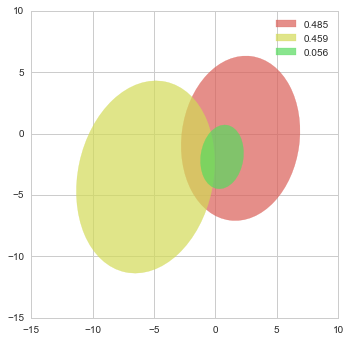

In [46]:
plot_gmm_ellipses(gmm)

## 5.2 Goodness-of-fit statistics

In [47]:
pretty_pd_display([goodness_of_fit_summary(gmm_pdf_result, kde_result)])

,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.009267,0.009552,6.261274e-09,0.015663,0.111172,0.992671


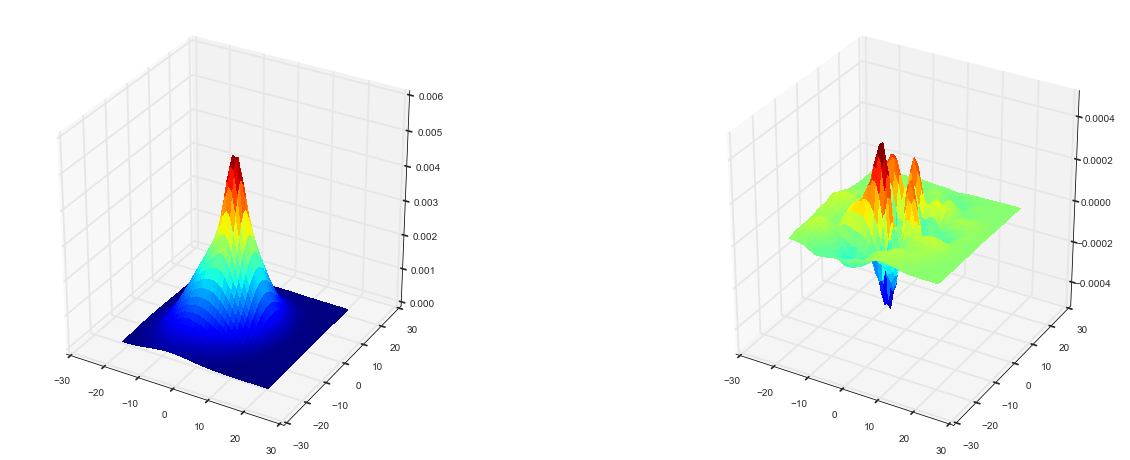

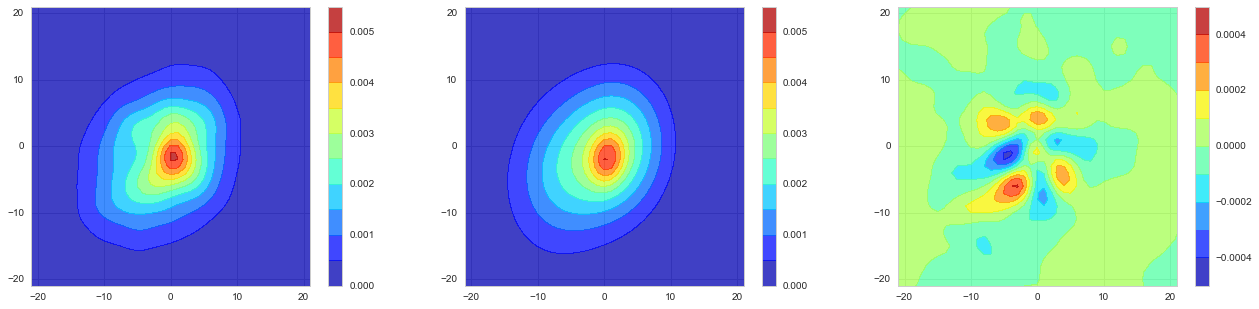

In [48]:
X = Y = PLOT_AXIS_RANGE
pdf_Z = generate_Z_from_X_Y(X,Y, mixed_model_pdf)# passing a function as an argument

def residule_between_kde_and_gmm(points):
    kde_vals = exp(kde.score_samples(points))
    gmm_vals = mixed_model_pdf(points)
    return kde_vals - gmm_vals 

residual_Z = generate_Z_from_X_Y(X,Y, residule_between_kde_and_gmm)

fig = plt.figure(figsize=(22,8))
ax1 = fig.add_subplot(1,2,1, projection = '3d')
plot_3d_prob_density(X,Y,pdf_Z,ax1)
ax2 = fig.add_subplot(1,2,2,projection = '3d')
plot_3d_prob_density(X,Y,residual_Z,ax2)

fig = plt.figure(figsize=(22,5))
ax1 = fig.add_subplot(1,3,1)
plot_2d_prob_density(X,Y,kde_Z,ax1)
ax2 = fig.add_subplot(1,3,2)
plot_2d_prob_density(X,Y,pdf_Z,ax2)
ax3 = fig.add_subplot(1,3,3)
plot_2d_prob_density(X,Y,residual_Z,ax3)

In [49]:
def f(V,theta):
    return (mixed_model_pdf([[V*cos(theta),V*sin(theta)]]))*V

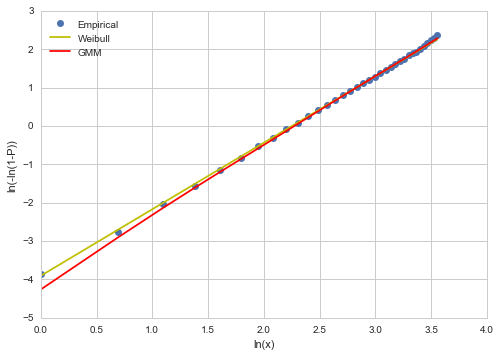

In [50]:
x = arange(0, max_speed)

# 1. Plot v-p points, empirical distribution
ecdf = sm.distributions.ECDF(df.speed)
y = ecdf(x)
plt.plot(log(x), log(-log(1-y)),'o', label = 'Empirical')

# 2. Weibull distribution
w_scale, c_shape = weibull_params[1], weibull_params[3]
qz=exp(-(x/c_shape)**w_scale)
plt.plot(log(x), log(-log(qz)),'-', color = 'y', label = 'Weibull')

# 3. GMM distribution
y_ = [integrate.nquad(f, [[0, x_val],[0, 2*pi]]) for x_val in x]
y = array(zip(*y_)[0])
plt.plot(log(x), log(-log(1-y)),'-', color = 'r', label = 'GMM')

plt_configure(xlabel='ln(x)',ylabel='ln(-ln(1-P))',
             legend={'loc':'best'})

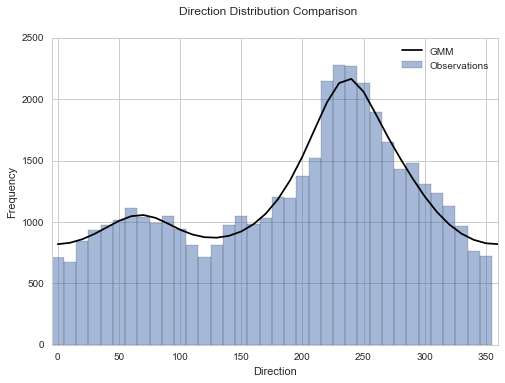

In [51]:
# Calculate Angle Distribution
x_vals = linspace(0,2*pi, num=36+1)
y_vals_ =[integrate.nquad(f, [[0, inf],[x_val-pi/36, x_val+pi/36]]) for x_val in x_vals]

# 1. integrate.nquad returns 2 vaule, result, abserr. Need to abstract the first to plot
# 2. * length of data size, to adjust the plot space
y_vals = array(zip(*y_vals_)[0])*len(df['dir']) 

df['dir'].hist(bins=DIR_BIN, alpha=0.5, label='Observations')

plt.plot(x_vals/pi*180, y_vals,'-', color='black', label='GMM')
plt_configure(title='Direction Distribution Comparison',
              xlabel='Direction',ylabel='Frequency', 
              legend={'loc': 'best'} ,tight='xtight')

(0, 4000.0)

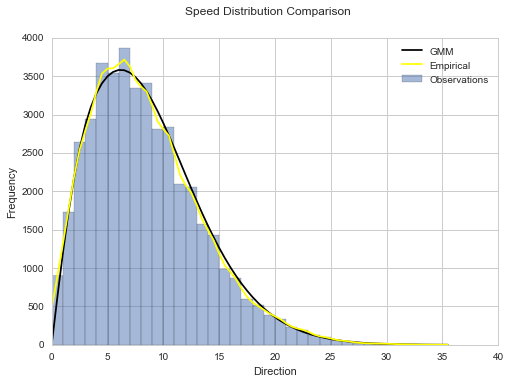

In [52]:
# Calculate Speed Distribution
# 1. GMM Model
x_vals = arange(0, max_speed, 0.5)
y_vals_ =[integrate.nquad(f, [[x_val-0.01, x_val+0.01],[0, 2*pi]]) for x_val in x_vals]
y_vals = array(zip(*y_vals_)[0])*len(df.speed)/0.02
plt.plot(x_vals, y_vals,'-', color='black', label='GMM')

# 2. Observation
df['speed'].hist(bins=arange(0, df.speed.max()), alpha=0.5, label='Observations')

# 3. 1d KDE
sample = array(df.speed).reshape(-1, 1)
kde_temp = neighbors.KernelDensity(bandwidth=0.5).fit(sample) 
y_vals = [exp(kde_temp.score_samples(x_val))*len(sample) for x_val in x_vals]
plt.plot(x_vals, y_vals,'-', color='yellow', label='Empirical')

plt_configure(title='Speed Distribution Comparison',
              xlabel='Direction',ylabel='Frequency',legend=True)
plt.gca().set_ylim(bottom = 0)

## 5.3 Sectoral Comaprison

In [53]:
# Calculate Speed Distribution
def model_data_comparison(df, original_incre = 10, incre = 10):
    start, end = -original_incre/2 + incre/2, 360
    max_diff_array = []
    max_speed = df.speed.max()
    
    # Find a max count for plotting histogram
    max_count = max_count_for_angles(df, start, end, incre)
    plot_range = [0, max_speed, 0, max_count*1.05]
    
    for angle in arange(start, end, incre):
        angle_radian, incre_radian = radians(angle), radians(incre)  
        start_angle, end_angle = angle-incre/2, angle+incre/2
        
        # Select data from observation
        sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)
        direction_prob = integrate.nquad(f, 
                                         [[0, inf],
                                          [angle_radian-incre_radian/2, angle_radian+incre_radian/2]])
        
        # 1. Frequency Comparison
        # 1.1. Data Histogram
        fig = plt.figure(figsize=(22,4))
        ax1 = fig.add_subplot(1,3,1)        
        sub_df['speed'].hist(bins=arange(0, sub_df.speed.max()), alpha=0.5)
        
        # 1.2. Model Distribution
        x_vals = linspace(0, sub_max_speed, 20)
        y_vals_ =[integrate.nquad(f, 
                  [[x_val-0.1, x_val+0.1],
                   [angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
                  for x_val in x_vals]
        y_vals = array(zip(*y_vals_)[0])/direction_prob[0] * len(sub_df.speed)/0.2
        plt.plot(x_vals, y_vals,'-', color='black')
        
        plt_configure(xlabel = "V", ylabel='Frequency')
        plt.axis(plot_range)
        
        # 2. CDF Comaprison
        ax2 = fig.add_subplot(1,3,2)
        x = linspace(0, max_speed, 20)
        # 2.1. Empirical distribution
        ecdf = sm.distributions.ECDF(sub_df.speed)
        y_cdf = ecdf(x)
        # 2.2. Model
        y_ =[integrate.nquad(f, 
                             [[0, x_val],
                              [angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
             for x_val in x]
        y_gmm = array(zip(*y_)[0])/direction_prob[0]
        plt.plot(x, y_cdf,'o')
        plt.plot(x, y_gmm,'-', color='red')
        plt_configure(xlabel = "V", ylabel='P')
        
        # 3. Weibull Comparison
        ax3 = fig.add_subplot(1,3,3)
        plt.plot(log(x), log(-log(1-y_cdf)),'o')
        plt.plot(log(x), log(-log(1-y_gmm)),'-', color='red')
        plt_configure(xlabel="ln(V)", ylabel="ln(-ln(1-P)")
        
        title = '%s (%s - %s) Degree' % (angle, start_angle, end_angle)
        plt.suptitle(title)
        
        diff = abs(y_cdf - y_gmm)
        max_diff_array.append([angle, diff.max(), x[diff.argmax()]])
        
        plt.show()
        print 'data size:', len(sub_df)
        print 'max diff:', diff.max(), ', speed value:', x[diff.argmax()], 'y gmm', y_gmm[diff.argmax()]
    return max_diff_array

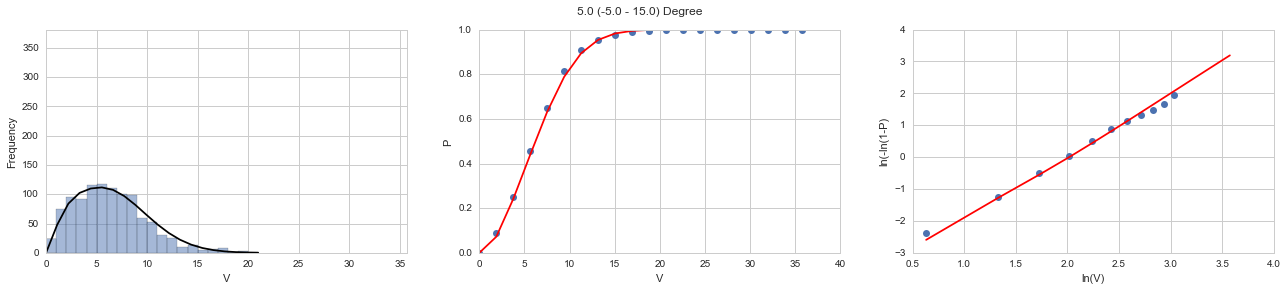

data size: 1045
max diff: 0.0258384064986 , speed value: 9.39853943723 y gmm 0.788515660487


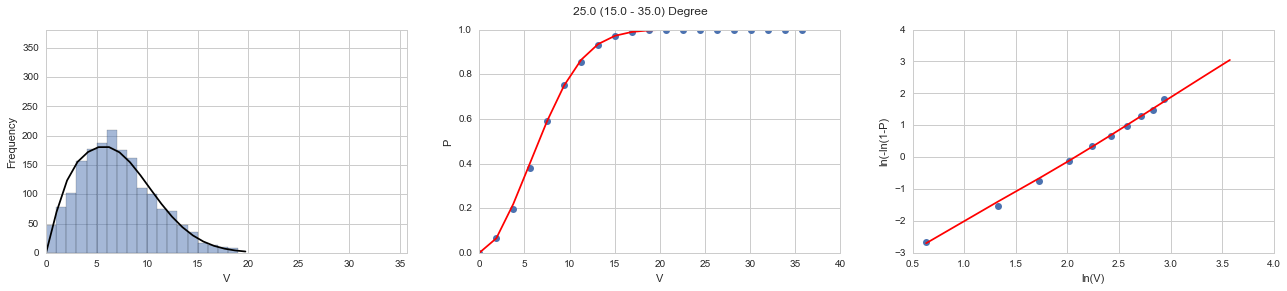

data size: 1784
max diff: 0.0267637751887 , speed value: 5.63912366234 y gmm 0.404566465772


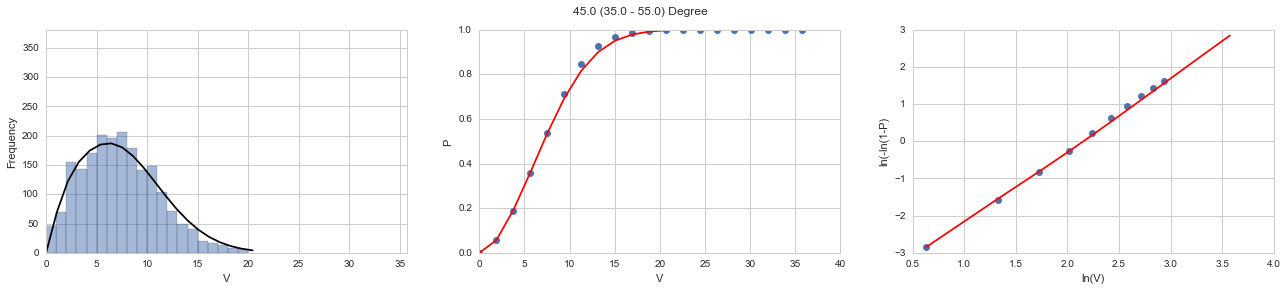

data size: 1990
max diff: 0.0327285562526 , speed value: 11.2782473247 y gmm 0.815010137215


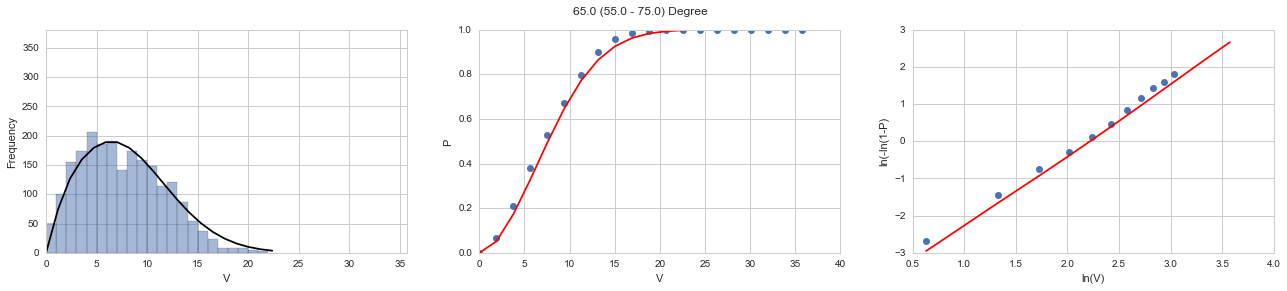

data size: 2155
max diff: 0.0517668026005 , speed value: 5.63912366234 y gmm 0.327815563989


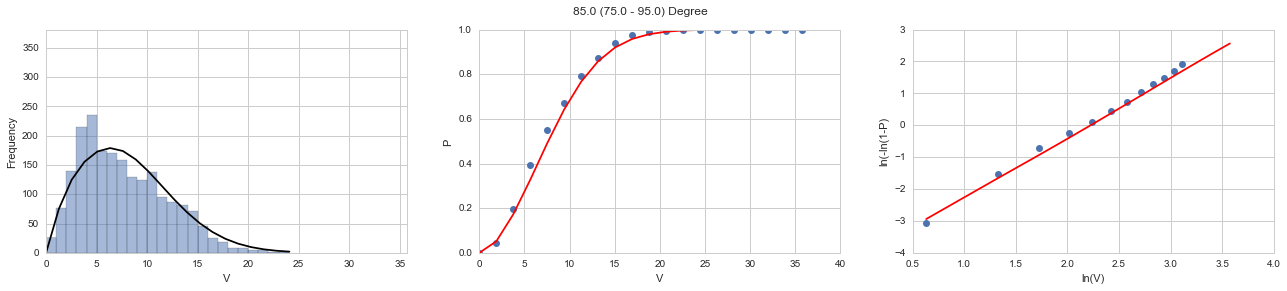

data size: 2041
max diff: 0.0647311671186 , speed value: 5.63912366234 y gmm 0.327233556056


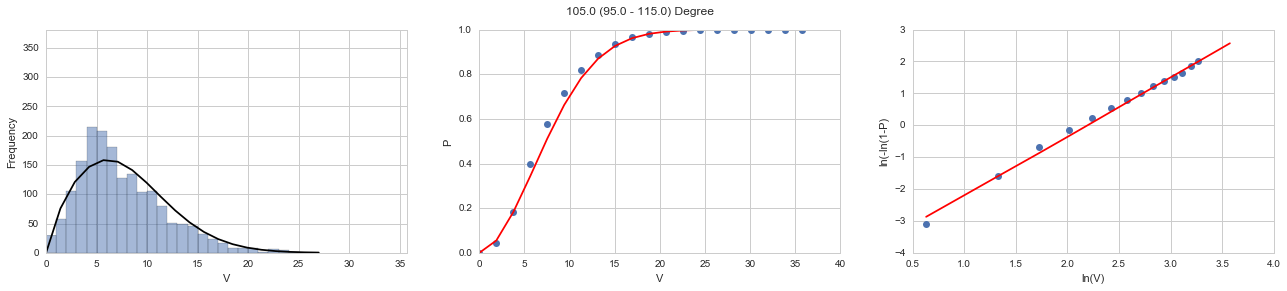

data size: 1760
max diff: 0.0638205705716 , speed value: 7.51883154978 y gmm 0.511179429428


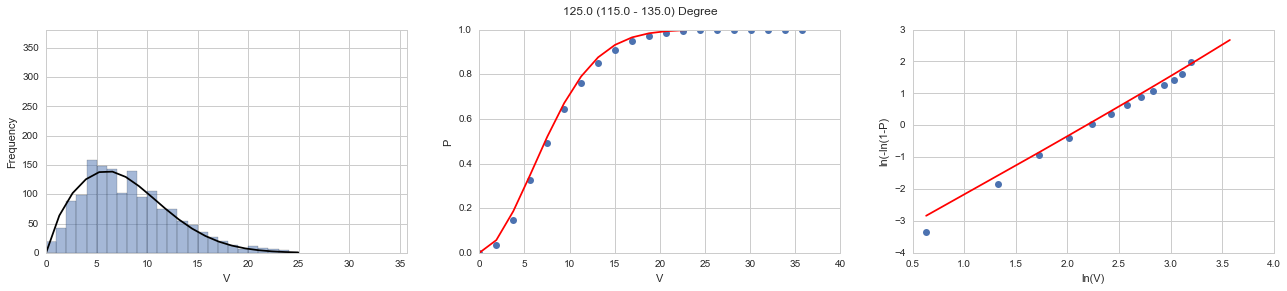

data size: 1527
max diff: 0.0375527631283 , speed value: 3.75941577489 y gmm 0.186210261491


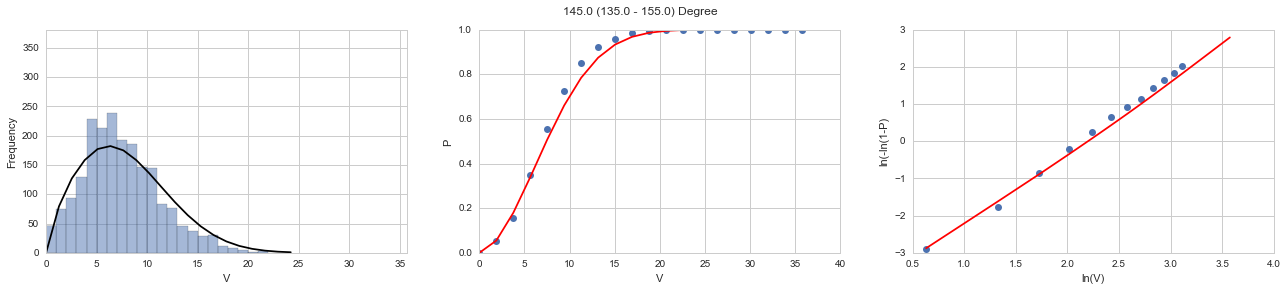

data size: 2019
max diff: 0.067243080583 , speed value: 11.2782473247 y gmm 0.784168509313


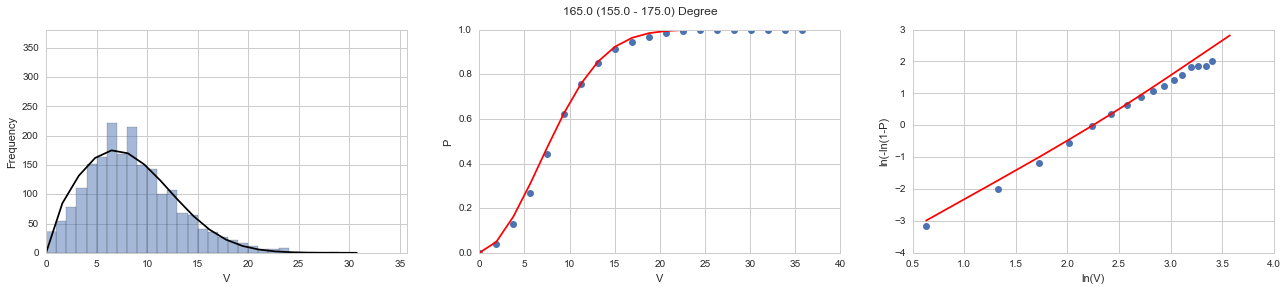

data size: 2014
max diff: 0.0432128396798 , speed value: 5.63912366234 y gmm 0.309846404724


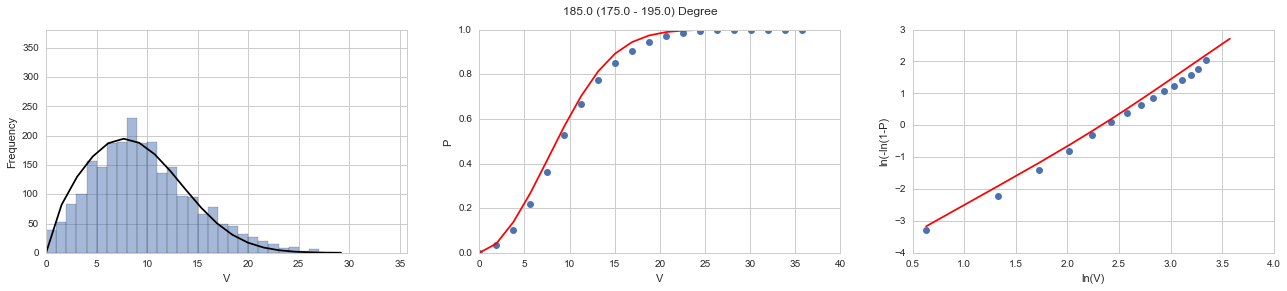

data size: 2399
max diff: 0.0520009392056 , speed value: 7.51883154978 y gmm 0.415485724533


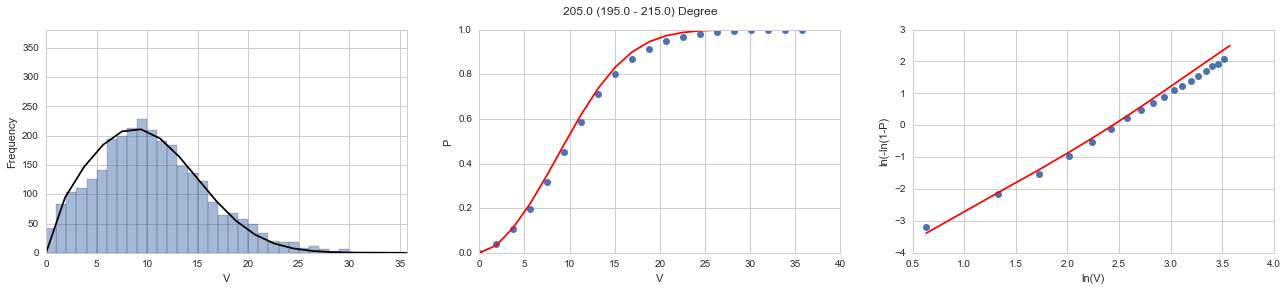

data size: 2894
max diff: 0.0347931558992 , speed value: 9.39853943723 y gmm 0.486417205657


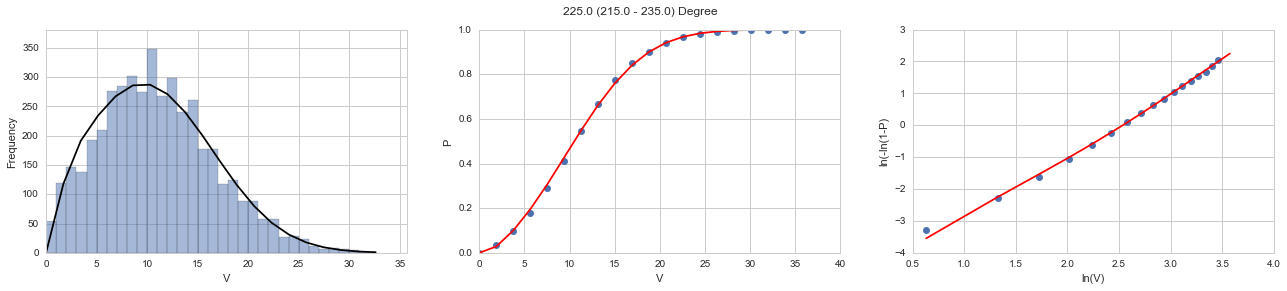

data size: 4423
max diff: 0.0162057880034 , speed value: 5.63912366234 y gmm 0.195043680836


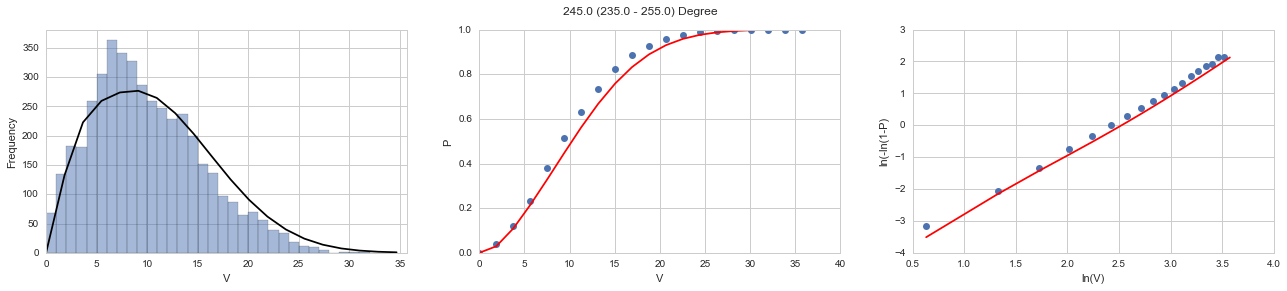

data size: 4409
max diff: 0.0687479790337 , speed value: 11.2782473247 y gmm 0.561780485471


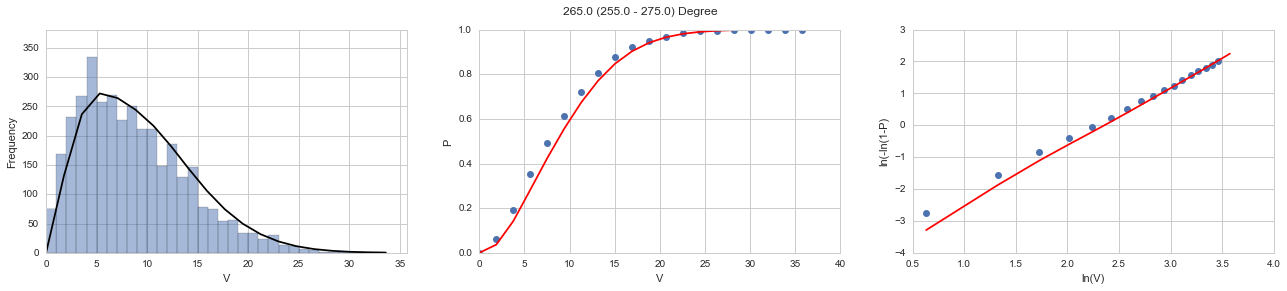

data size: 3547
max diff: 0.072990764194 , speed value: 5.63912366234 y gmm 0.281957079054


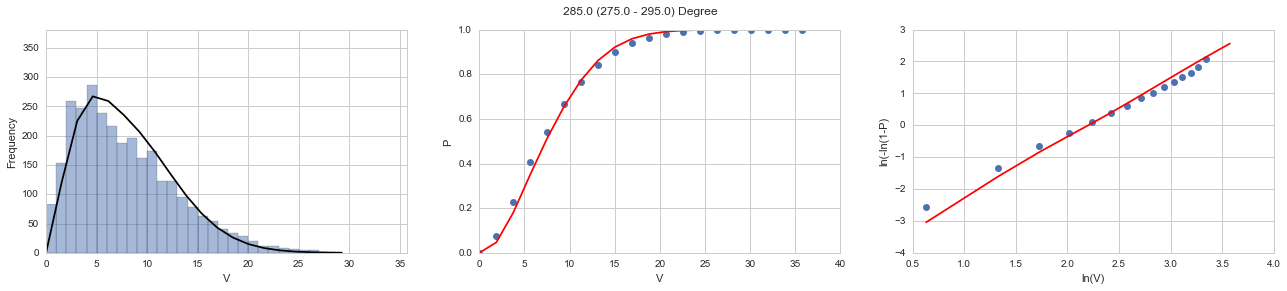

data size: 2916
max diff: 0.0576791571525 , speed value: 5.63912366234 y gmm 0.350757056839


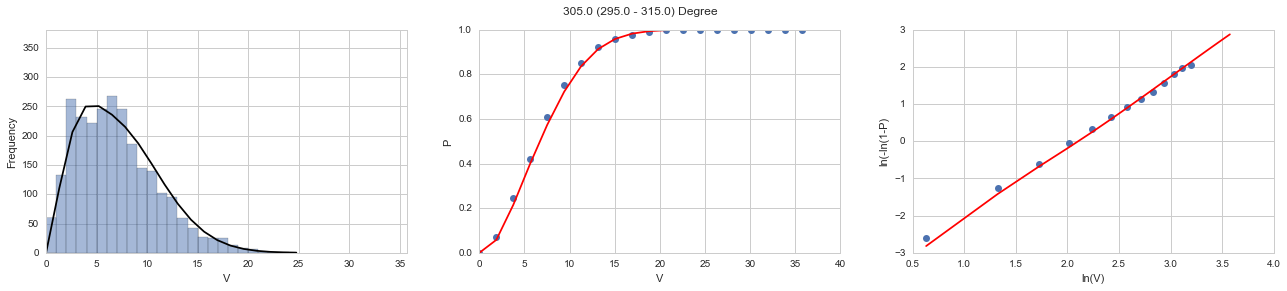

data size: 2547
max diff: 0.036563854098 , speed value: 7.51883154978 y gmm 0.573173091328


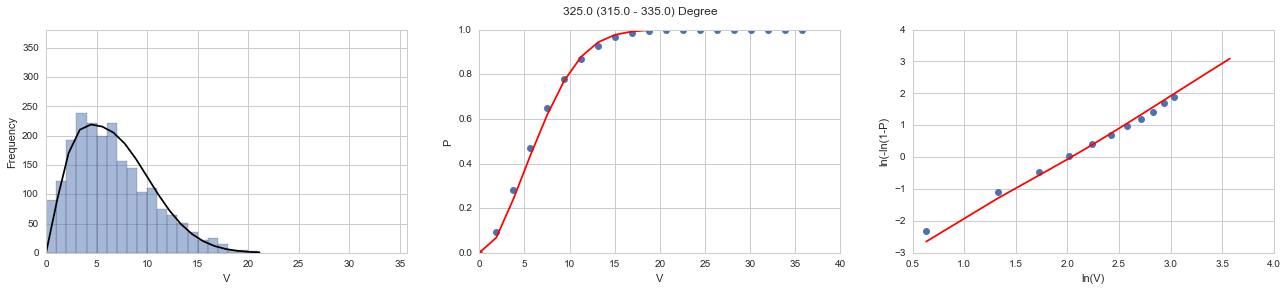

data size: 2102
max diff: 0.0418025121214 , speed value: 3.75941577489 y gmm 0.23983402451


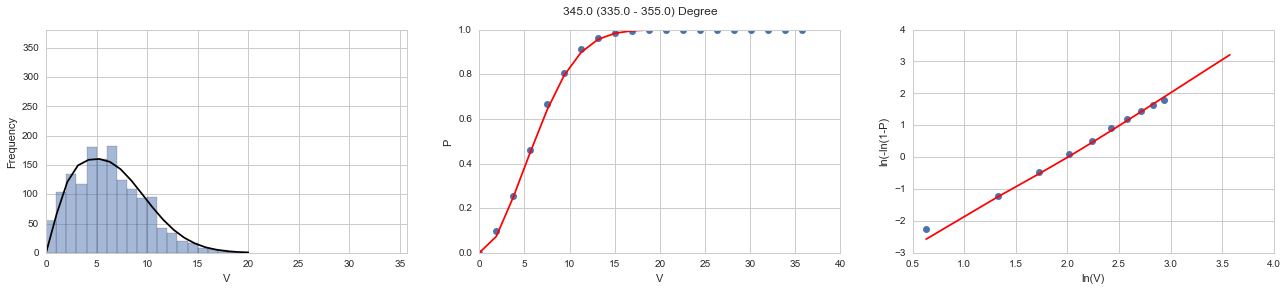

data size: 1494
max diff: 0.026221210059 , speed value: 1.87970788745 y gmm 0.0735110523238


In [54]:
if len(effective_column) == 16:
    max_diff_array = model_data_comparison(df, SECTOR_LENGTH, 22.5)
else: 
    max_diff_array = model_data_comparison(df, SECTOR_LENGTH, 20)

### 5.3.1 Variability over the years

(0, 0.10000000000000001)

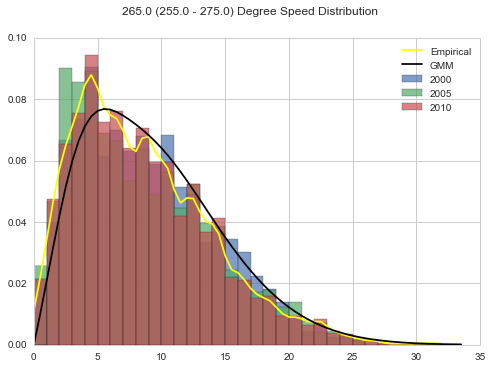

In [55]:
max_diff_element = max(max_diff_array, key=lambda x: x[1])
angle =  max_diff_angle = max_diff_element[0]
incre = 20

# Select data from observation
start_angle, end_angle = angle-incre/2, angle+incre/2
angle_radian, incre_radian = radians(angle), radians(incre)  
sub_df, max_speed = select_df_by_angle(df, start_angle, end_angle)

x_vals = arange(0, max_speed, 0.5)

# 1. 1d KDE 
sample = array(sub_df.speed).reshape(-1, 1)
sub_kde = neighbors.KernelDensity(bandwidth=0.5).fit(sample) 
y_vals = [exp(sub_kde.score_samples(x_val))
          for x_val in x_vals]
plt.plot(x_vals, y_vals,'-', color='yellow', label='Empirical')

# 2. GMM
y_vals_ =[integrate.nquad(f, [[x_val-0.01, x_val+0.01],
                              [angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
          for x_val in x_vals]
direction_prob = integrate.nquad(f, [[0, inf],
                                     [angle_radian-incre_radian/2, angle_radian+incre_radian/2]])
y_vals = array(zip(*y_vals_)[0])/direction_prob[0] /0.02
plt.plot(x_vals, y_vals,'-', color='black', label = 'GMM')

for start_time in xrange(20000000, 20150000, 50000):
    end_time = start_time + 50000 
    df_other_years = df_all_years.query('(date >= @start_time) & (date < @end_time)')
    df_other_years_at_angle, _ = select_df_by_angle(df_other_years, start_angle, end_angle)
    if len(df_other_years) > 0 :
        df_other_years_at_angle['speed'].hist(bins=arange(0, max_speed), 
                                              normed=True,alpha=0.7,
                                              label = str(int(start_time/10000)))

plt_configure(title='%s (%s - %s) Degree Speed Distribution' % (angle, start_angle, end_angle),
              legend=True)
plt.gca().set_ylim(bottom = 0)

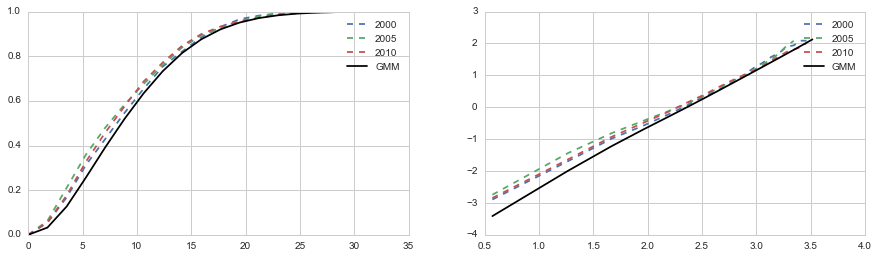

In [56]:
fig = plt.figure(figsize=(15,4))

x = linspace(0, max_speed, 20)
for start_time in xrange(20000000, 20150000, 50000):
    end_time = start_time + 50000 
    df_other_years = df_all_years.query('(date >= @start_time) & (date < @end_time)')
    df_other_years_at_angle, _ = select_df_by_angle(df_other_years, start_angle, end_angle)
    if len(df_other_years_at_angle) > 0 :
        
        sample = df_other_years_at_angle.speed
        ecdf = sm.distributions.ECDF(sample)
        y_cdf = ecdf(x)

        ax1 = fig.add_subplot(1,2,1) 
        plt.plot(x, y_cdf,'--', label = str(int(start_time/10000)))

        ax3 = fig.add_subplot(1,2,2) 
        plt.plot(log(x), log(-log(1-y_cdf)),'--', label = str(int(start_time/10000)))
       
y_ =[integrate.nquad(f, 
                     [[0, x_val],
                      [angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) for x_val in x]
direction_prob = integrate.nquad(f, 
                                 [[0, inf],
                                  [angle_radian-incre_radian/2, angle_radian+incre_radian/2]])
y_gmm = array(zip(*y_)[0])/direction_prob[0]

ax1 = fig.add_subplot(1,2,1) 
plt.plot(x, y_gmm,'-', color='black', label='GMM')
plt.legend()

ax3 = fig.add_subplot(1,2,2) 
plt.plot(log(x), log(-log(1-y_gmm)),'-', color='black',label='GMM')
plt.legend()

### 5.3.2 Bootstrap, to see the variability of each sector

(0, 250.0)

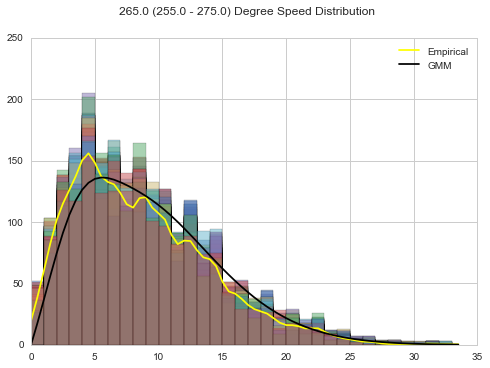

In [57]:
FRACTION = 0.5 

x_vals = arange(0, max_speed, 0.5)

# 1. 1d KDE 
sample = array(sub_df.speed).reshape(-1, 1)
sub_kde = neighbors.KernelDensity(bandwidth=0.5).fit(sample) 
y_vals = [exp(sub_kde.score_samples(x_val))*len(sub_df.speed)*FRACTION
          for x_val in x_vals]
plt.plot(x_vals, y_vals,'-', color='yellow', label='Empirical')

#2. GMM
y_vals_ =[integrate.nquad(f, 
                          [[x_val-0.01, x_val+0.01],
                              [angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
          for x_val in x_vals]
direction_prob = integrate.nquad(f, 
                                 [[0, inf],
                                     [angle_radian-incre_radian/2, angle_radian+incre_radian/2]])
y_vals = array(zip(*y_vals_)[0])/direction_prob[0]/0.02 *len(sub_df.speed)*FRACTION
plt.plot(x_vals, y_vals,'-', color='black', label='GMM')

bins = arange(0, max_speed, 1)
for i in xrange(1,100):
    sub_df_resampled = sub_df.sample(frac=FRACTION, replace=True)
    sub_df_resampled['speed'].hist(bins=bins, alpha=0.5)

plt_configure(title='%s (%s - %s) Degree Speed Distribution' % (angle, start_angle, end_angle), 
              legend=True)
plt.gca().set_ylim(bottom = 0)

0.0813076034618 5.30576716928 0.256347413449


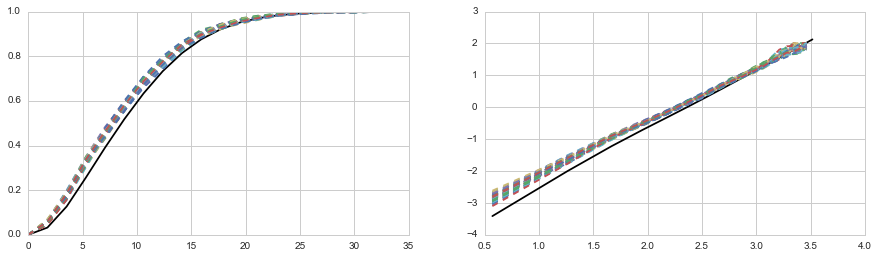

In [58]:
fig = plt.figure(figsize=(15,4))

x = linspace(0, max_speed, 20)
y_ =[integrate.nquad(f, [[0, x_val],[angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) for x_val in x]
direction_prob = integrate.nquad(f, [[0, inf],[angle_radian-incre_radian/2, angle_radian+incre_radian/2]])
y_gmm = array(zip(*y_)[0])/direction_prob[0]

ax1 = fig.add_subplot(1,2,1) 
plt.plot(x, y_gmm,'-', color = 'black')

ax3 = fig.add_subplot(1,2,2) 
plt.plot(log(x), log(-log(1-y_gmm)),'-', color = 'black')

for i in xrange(1,100):
    sub_df_resampled = sub_df.sample(frac=FRACTION, replace=True)
    
    sample = sub_df_resampled.speed
    ecdf = sm.distributions.ECDF(sample)
    y_cdf = ecdf(x)

    ax1 = fig.add_subplot(1,2,1) 
    plt.plot(x, y_cdf,'--')

    ax3 = fig.add_subplot(1,2,2) 
    plt.plot(log(x), log(-log(1-y_cdf)),'--')
    
diff = abs(y_cdf - y_gmm)
print diff.max(), x[diff.argmax()], y_gmm[diff.argmax()]

# 6. Variability of results & Cross-Validation

In [59]:
from sklearn.cross_validation import train_test_split, KFold

if 'bandwidth' not in globals():
    bandwidth = DEFAULT_BANDWDITH    
    
points = FITTING_RANGE
    
def fit_gmm(df, number_of_gaussian = 3, fit_method = 'square_error'):
    # 1. Create Input, speed_set
    sample = sub_speed_set = array(zip(df.x, df.y))
    points = FITTING_RANGE
    
    # 2. KDE + EM fitting
    kde = neighbors.KernelDensity(bandwidth=bandwidth).fit(sample) 
    kde_result = exp(kde.score_samples(points))
    
    clf = mixture.GMM(n_components=number_of_gaussian, covariance_type='full')
    clf.fit(sample)
    gmm_em_result = read_gmm_em_result(clf)
        
    # 3. GMM fitting
    x0 = gmm_em_result
    bonds = [(0., 0.99),(-fit_limit, fit_limit),
             (-fit_limit, fit_limit),(0., fit_limit),(0., fit_limit),(-0.99, 0.99)]*int(len(x0)/6)
    cons = [{'type': 'eq', 'fun': lambda x: sum(x[::6]) - 1},
#             {'type': 'ineq', 'fun': lambda x: width_height_ratios_set(x) - 1/3},
#             {'type': 'ineq', 'fun': lambda x: 3 - width_height_ratios_set(x)},
           ]
 
    result = sp.optimize.minimize(
        lambda x0: GMM_fit_score(x0, kde_result, points, method=fit_method),
        x0,
        bounds = bonds,
        constraints = cons,
        tol = 0.000000000001,
        options = {"maxiter": 500})  
    
    # 4. Returns
    gmm = group_gmm_param_from_gmm_param_array(result.x)  
    mixed_model_pdf = generate_gmm_pdf_from_grouped_gmm_param(gmm)
    gmm_pdf_result = mixed_model_pdf(points)
    
    return {
        'gmm' : gmm,
        'kde_clf': kde,
        'kde_result': kde_result,
        'gmm_pdf_result': gmm_pdf_result,
        'number_of_iteration': result.nit,
    }

## 6.1 Variability of the Result

,weight,mean_x,mean_y,sig_x,sig_y,corr
1,0.537,1.664,-0.591,4.976,6.747,0.118
2,0.413,-6.047,-3.531,5.596,8.040,0.139
3,0.050,0.671,-1.891,1.740,2.497,0.073


GMM Plot Result
0.537479692452 [[ 1.66449581 -0.59117615]] [ 4.90216832  6.80079561] 169.560844972
0.412591651891 [[-6.04657683 -3.53062065]] [ 5.49332542  8.11053434] 169.722268965
0.0499286556577 [[ 0.67068012 -1.89080168]] [ 1.73086445  2.50319432] 174.418001528


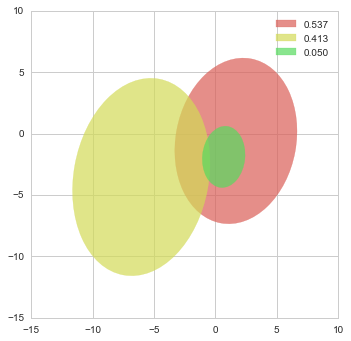

,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.012351,0.009859,7.247589e-09,0.017119,0.119608,0.991443


,weight,mean_x,mean_y,sig_x,sig_y,corr
1,0.583,1.446,-0.646,4.998,6.747,0.114
2,0.371,-6.663,-3.975,5.353,8.039,0.106
3,0.045,0.463,-1.904,1.654,2.381,0.098


GMM Plot Result
0.583386095452 [[ 1.44574599 -0.64585902]] [ 4.92814794  6.79790861] 169.774812531
0.371156063667 [[-6.66278375 -3.97465102]] [ 5.29989673  8.07476777] 172.881596014
0.0454578408813 [[ 0.46311163 -1.90409344]] [ 1.63907925  2.39144747] 172.634538266


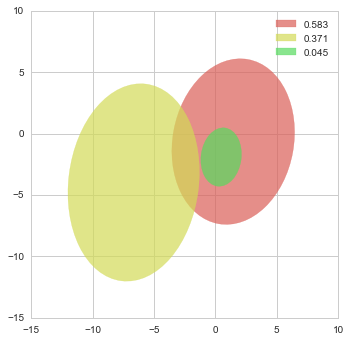

,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.009583,0.008582,5.845622e-09,0.015212,0.107392,0.993081


,weight,mean_x,mean_y,sig_x,sig_y,corr
1,0.477,-5.369,-3.198,5.777,8.061,0.196
2,0.470,2.045,-0.686,4.845,6.632,0.104
3,0.053,0.469,-2.107,1.772,2.523,0.190


GMM Plot Result
0.477152098446 [[-5.36864781 -3.19803455]] [ 5.56091368  8.21147647] 164.967490665
0.470307642345 [[ 2.04467561 -0.68646614]] [ 4.79023424  6.67205827] 170.964035093
0.0525402592093 [[ 0.46902143 -2.10716409]] [ 1.7118152   2.56477983] 166.084653934


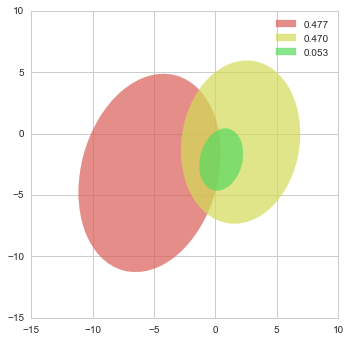

,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.0107,0.009868,7.152528e-09,0.016644,0.118747,0.991639


,weight,mean_x,mean_y,sig_x,sig_y,corr
1,0.533,1.757,-0.544,4.940,6.809,0.128
2,0.406,-6.322,-3.603,5.432,7.989,0.141
3,0.061,0.543,-1.980,1.809,2.630,0.089


GMM Plot Result
0.532740525747 [[ 1.75715523 -0.54353314]] [ 4.85686806  6.8686642 ] 169.26821916
0.406257930071 [[-6.32195574 -3.6031288 ]] [ 5.33409286  8.05526883] 170.194819536
0.0610015441814 [[ 0.54286943 -1.97969141]] [ 1.79545443  2.63957596] 173.446950356


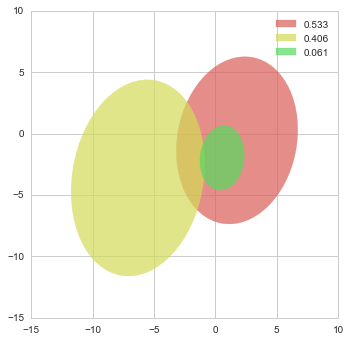

,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.010166,0.008659,6.353381e-09,0.01562,0.112071,0.992613


,weight,mean_x,mean_y,sig_x,sig_y,corr
1,0.492,1.965,-0.162,4.851,6.613,0.051
2,0.450,-5.697,-3.774,5.641,7.763,0.119
3,0.058,0.565,-1.988,1.765,2.634,0.114


GMM Plot Result
0.491821004009 [[ 1.96504647 -0.16164515]] [ 4.83783501  6.6224559 ] 175.439535515
0.450222939579 [[-5.69658986 -3.77403354]] [ 5.55800287  7.82231448] 169.939548346
0.057956056412 [[ 0.56483796 -1.9879093 ]] [ 1.7443056   2.64724183] 172.262387183


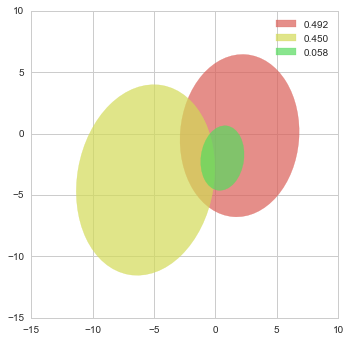

,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.009857,0.009567,6.384114e-09,0.015642,0.112215,0.992652


,weight,mean_x,mean_y,sig_x,sig_y,corr
1,0.549,1.640,-0.586,4.924,6.756,0.100
2,0.396,-6.403,-3.859,5.477,7.979,0.127
3,0.055,0.575,-1.783,1.696,2.602,0.059


GMM Plot Result
0.549338087055 [[ 1.64009223 -0.58635244]] [ 4.87234331  6.79271323] 171.378602676
0.396153793979 [[-6.40348533 -3.85935905]] [ 5.39525602  8.03435596] 170.860816121
0.0545081189661 [[ 0.57507696 -1.78321591]] [ 1.69067156  2.60541362] 176.206950106


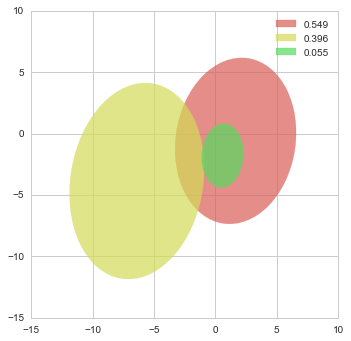

,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.011247,0.010012,6.786872e-09,0.016098,0.11581,0.99208


,weight,mean_x,mean_y,sig_x,sig_y,corr
1,0.863,-1.846,-1.945,6.861,7.729,0.255
2,0.093,2.073,-0.550,2.787,4.515,-0.324
3,0.044,-0.036,-2.532,1.733,2.533,0.340


GMM Plot Result
0.863464390188 [[-1.84639566 -1.9448235 ]] [ 6.20130488  8.26771287] 147.543791797
0.0925296654239 [[ 2.07302931 -0.5501325 ]] [ 2.56193671  4.64638145] -163.538351917
0.0440059443877 [[-0.03604806 -2.53223493]] [ 1.56293702  2.64134176] 159.407791257


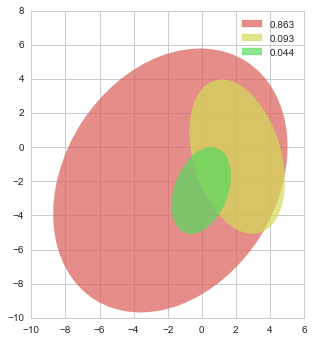

,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.01388,0.009932,6.559230e-09,0.015971,0.11382,0.992324


,weight,mean_x,mean_y,sig_x,sig_y,corr
1,0.788,-2.536,-2.268,6.745,7.610,0.221
2,0.152,2.735,0.264,3.779,5.655,-0.039
3,0.059,0.342,-2.047,1.787,2.657,0.144


GMM Plot Result
0.788364432182 [[-2.53643644 -2.268386  ]] [ 6.22559349  8.04031582] 149.326815861
0.152475006738 [[ 2.73547111  0.26371596]] [ 3.77344505  5.65824254] -177.321317903
0.0591605610792 [[ 0.34190396 -2.04723399]] [ 1.75361427  2.67948651] 170.254276053


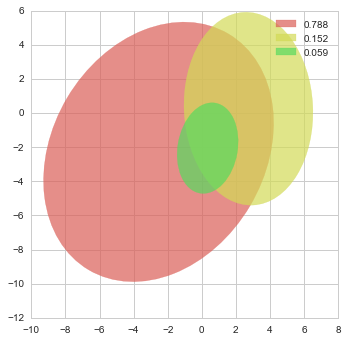

,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.009465,0.008223,6.238379e-09,0.015342,0.110993,0.992812


,weight,mean_x,mean_y,sig_x,sig_y,corr
1,0.485,-5.346,-3.530,5.701,7.632,0.150
2,0.460,2.297,-0.157,4.711,6.639,0.065
3,0.055,0.453,-2.040,1.708,2.542,0.135


GMM Plot Result
0.485287215932 [[-5.34648634 -3.52975036]] [ 5.56224441  7.73386876] 166.567253852
0.459956220303 [[ 2.29742165 -0.15656548]] [ 4.69116706  6.65332871] 174.775012561
0.0547565637645 [[ 0.452682  -2.0403606]] [ 1.67970238  2.56011836] 170.847827466


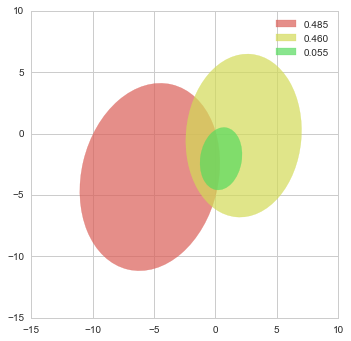

,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.011437,0.011208,6.942642e-09,0.016164,0.116995,0.992014


,weight,mean_x,mean_y,sig_x,sig_y,corr
1,0.829,-2.301,-1.905,6.687,7.645,0.260
2,0.111,3.547,-1.216,3.351,5.546,-0.174
3,0.061,0.318,-1.930,1.777,2.770,0.227


GMM Plot Result
0.828570984303 [[-2.30141303 -1.90470329]] [ 6.05156126  8.15741518] 148.659869177
0.110510506433 [[ 3.54669017 -1.21572887]] [ 3.2718276   5.59337442] -170.830293871
0.0609185092645 [[ 0.31769968 -1.92981334]] [ 1.7014331  2.8170476] 166.841022799


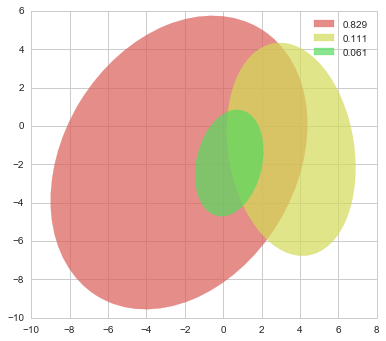

,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.010374,0.007181,5.779449e-09,0.014982,0.106752,0.993253


In [60]:
for i in range(10):
    df_resampled = df.sample(frac=1, replace=True)
    result = fit_gmm(df_resampled, NUMBER_OF_GAUSSIAN, fit_method = FIT_METHOD)
    display(pretty_print_gmm(result['gmm']))
    plot_gmm_ellipses(result['gmm'])
    pretty_pd_display([goodness_of_fit_summary(result['gmm_pdf_result'], result['kde_result'])])

## 6.2 Cross-validation, to select the number of Gaussian

In [61]:
## 5-fold cross validation
gaussian_number_range = arange(1,7)
CV_result_train_all,CV_result_test_all =[],[]
number_of_fold = 4
print 'Number of train/test dataset', len(df)*(number_of_fold-1)/number_of_fold, len(df)/number_of_fold

for number_of_gaussian in gaussian_number_range:
    print '  '
    print 'Number of gaussian', number_of_gaussian
    
    kf = KFold(len(df), n_folds=number_of_fold, shuffle=True) 

    CV_result_train, CV_result_test = [],[]
    for train_index, test_index in kf:
        sub_df, sub_df_test = df.iloc[train_index], df.iloc[test_index]

        # 1. Train
        result = fit_gmm(sub_df, number_of_gaussian, fit_method = FIT_METHOD)
        gmm_pdf_result_train = result['gmm_pdf_result']
        kde_result_train = result['kde_result']

        # 2. Validate
        # GMM from Train - KDE from Test
        sample = array(zip(sub_df_test.x, sub_df_test.y))
        kde_test = neighbors.KernelDensity(bandwidth=bandwidth).fit(sample) 
        kde_result_test = exp(kde_test.score_samples(points))

        gof_train = goodness_of_fit_summary(gmm_pdf_result_train, 
                                            kde_result_train,)
        gof_test =  goodness_of_fit_summary(gmm_pdf_result_train, 
                                            kde_result_test,)
                
        CV_result_train.append(gof_train)
        CV_result_test.append(gof_test)
        
    CV_result_train_all.append(CV_result_train)
    CV_result_test_all.append(CV_result_test)
    
    print 'Train'
    pretty_pd_display(CV_result_train)
    print 'Test'
    pretty_pd_display(CV_result_test)

Number of train/test dataset 32555.25 10851.75
  
Number of gaussian 1
Train


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.034176,0.044837,4.868249e-08,0.043687,0.309910,0.943128
1,0.035956,0.046757,5.127826e-08,0.045313,0.318202,0.939870
2,0.034740,0.046343,5.069029e-08,0.043994,0.316474,0.940657
3,0.034813,0.045923,5.024867e-08,0.044456,0.314811,0.941241


Test


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.040341,0.046871,5.451631e-08,0.045942,0.328297,0.935938
1,0.034737,0.040318,4.902837e-08,0.042337,0.310931,0.943134
2,0.038342,0.047366,5.327441e-08,0.047542,0.323803,0.937886
3,0.039944,0.050072,5.082916e-08,0.044373,0.317133,0.940445


  
Number of gaussian 2
Train


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.017068,0.015547,9.417105e-09,0.019210,0.136390,0.988942
1,0.016320,0.015812,8.877227e-09,0.018686,0.132368,0.989569
2,0.016782,0.015017,9.401168e-09,0.019036,0.136177,0.989058
3,0.016850,0.015472,9.447195e-09,0.019320,0.136559,0.988967


Test


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.021440,0.018759,1.034935e-08,0.020135,0.142771,0.988026
1,0.020126,0.017008,1.207099e-08,0.021536,0.154380,0.986062
2,0.021236,0.017518,1.115691e-08,0.021198,0.148553,0.986755
3,0.017277,0.012279,1.042847e-08,0.019843,0.143466,0.987739


  
Number of gaussian 3
Train


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.011376,0.009326,6.035797e-09,0.015300,0.109125,0.992982
1,0.009475,0.010019,6.873280e-09,0.016411,0.116502,0.991927
2,0.009586,0.009061,6.509475e-09,0.016071,0.113298,0.992320
3,0.009517,0.006546,5.829201e-09,0.015095,0.107324,0.993214


Test


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.013328,0.011100,9.829111e-09,0.019910,0.139391,0.988292
1,0.012830,0.013965,7.362240e-09,0.016983,0.120477,0.991496
2,0.011646,0.010485,7.828116e-09,0.017036,0.124490,0.991072
3,0.015654,0.009859,8.730713e-09,0.018561,0.131067,0.989628


  
Number of gaussian 4
Train


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.014211,0.013209,4.436921e-09,0.013187,0.093568,0.994839
1,0.026382,0.010221,3.763757e-09,0.012097,0.086195,0.995568
2,0.018870,0.010506,3.909505e-09,0.012432,0.087839,0.995436
3,0.037538,0.011027,4.301134e-09,0.012956,0.092163,0.994954


Test


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.013746,0.013465,5.493592e-09,0.014664,0.104187,0.993461
1,0.044910,0.013053,7.422630e-09,0.017192,0.121036,0.991487
2,0.019555,0.014206,6.149574e-09,0.015271,0.110205,0.992757
3,0.047453,0.009595,5.354120e-09,0.014481,0.102729,0.993790


  
Number of gaussian 5
Train


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.003847,0.003601,1.145420e-09,0.006708,0.047526,0.998658
1,0.004516,0.002498,1.212865e-09,0.006884,0.048947,0.998578
2,0.004701,0.002188,1.347171e-09,0.007208,0.051549,0.998431
3,0.004388,0.001718,1.169875e-09,0.006824,0.048077,0.998628


Test


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.009207,0.008465,3.096071e-09,0.010967,0.078289,0.996394
1,0.006702,0.007205,2.505867e-09,0.009919,0.070252,0.997085
2,0.008392,0.011702,3.349982e-09,0.011736,0.081402,0.996028
3,0.008411,0.017229,5.346315e-09,0.014124,0.102586,0.993799


  
Number of gaussian 6
Train


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.002954,0.001703,7.087272e-10,0.005279,0.037413,0.999165
1,0.003239,0.001723,7.560104e-10,0.005483,0.038640,0.999107
2,0.003930,0.003519,1.100670e-09,0.006513,0.046575,0.998718
3,0.003627,0.001822,8.632289e-10,0.005793,0.041289,0.999000


Test


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.006219,0.007883,3.552094e-09,0.011633,0.083665,0.995926
1,0.008832,0.009770,4.379398e-09,0.012603,0.092905,0.995023
2,0.010491,0.012770,4.994597e-09,0.014336,0.099526,0.994083
3,0.007221,0.007839,3.391209e-09,0.011631,0.081753,0.995910


In [62]:
train_scores_mean, train_scores_std = generate_mean_std_gof(CV_result_train_all)
print 'Train gof mean, std'
display(train_scores_mean)

test_scores_mean, test_scores_std = generate_mean_std_gof(CV_result_test_all)
print 'Test gof mean, std'
display(test_scores_mean)

Train gof mean, std


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.034921,0.045965,5.022493e-08,0.044363,0.314849,0.941224
1,0.016755,0.015462,9.285674e-09,0.019063,0.135373,0.989134
2,0.009989,0.008738,6.311938e-09,0.015719,0.111562,0.992611
3,0.024250,0.011241,4.102829e-09,0.012668,0.089941,0.995199
4,0.004363,0.002501,1.218833e-09,0.006906,0.049025,0.998574
5,0.003437,0.002192,8.571591e-10,0.005767,0.040979,0.998998


Test gof mean, std


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.038341,0.046157,5.191206e-08,0.045049,0.320041,0.939351
1,0.020020,0.016391,1.100143e-08,0.020678,0.147292,0.987146
2,0.013364,0.011352,8.437545e-09,0.018122,0.128856,0.990122
3,0.031416,0.012580,6.104979e-09,0.015402,0.109539,0.992874
4,0.008178,0.011150,3.574559e-09,0.011687,0.083132,0.995826
5,0.008191,0.009565,4.079325e-09,0.012551,0.089463,0.995236


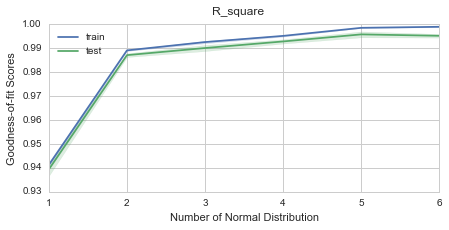

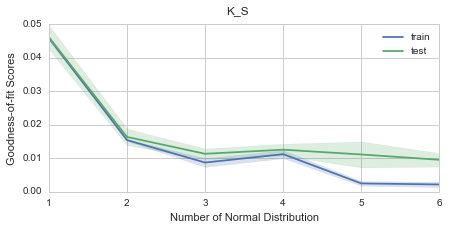

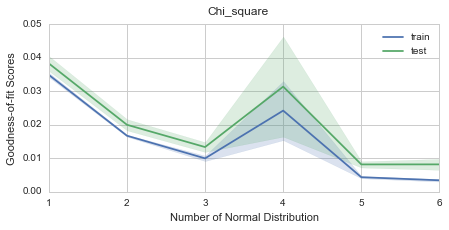

In [63]:
prop_cycle=sns.color_palette()
for column in ['R_square','K_S','Chi_square', ]:
    fig, ax = plt.subplots()
    fig.set_size_inches(7, 3)
    plt.plot(gaussian_number_range, train_scores_mean[column],
             '-', label = 'train', color=prop_cycle[0])
    plt.fill_between(gaussian_number_range, 
                     train_scores_mean[column] - train_scores_std[column],
                     train_scores_mean[column] + train_scores_std[column], 
                     alpha=0.2, color=prop_cycle[0])
    
    plt.plot(gaussian_number_range, test_scores_mean[column],
             '-', label = 'test',color=prop_cycle[1])
    plt.fill_between(gaussian_number_range, 
                 test_scores_mean[column] - test_scores_std[column],
                 test_scores_mean[column] + test_scores_std[column], 
                 alpha=0.2,color=prop_cycle[1])
    plt.suptitle(column)
    plt.xticks(gaussian_number_range)
    plt.gca().set(xlabel='Number of Normal Distribution', ylabel='Goodness-of-fit Scores')
    plt.legend(loc='best')
    plt.show()

In [64]:
import time
save_notebook()
time.sleep(3)
location_name = get_location_name(ipath)
current_file = 'GMM.ipynb'
output_file = './output_HTML/'+location_name+'.html' 
output_HTML(current_file, output_file)

## 6.3 Variability of KDE

In [65]:
sss

NameError: name 'sss' is not defined

In [ ]:
gmm1 = [0.552104,-0.055681,2.256591,2.757752,2.731348,0.034628,
        0.372591,2.376362,-2.098443,1.621717,2.213625,-0.01429,
        0.055879,1.009152,-1.430799,2.10049,0.808011,0.08083,
        0.019425,-0.432981,2.574572,0.784784,0.796954,-0.020531]

gmm2 = [0.552104,-0.055681,2.256591,2.757752,2.731348,0.034628,
        0.372591,2.376362,-2.098443,1.621717,2.213625,-0.01429,]

gmm3 = [0.552104,-0.055681,2.256591,2.757752,2.731348,0.034628,]

gmms = [gmm1,gmm2,gmm3]
pdfs =[]

for gmm in gmms:
    plot_gmm_ellipses(gmm)
    gmm = group_gmm_param_from_gmm_param_array(gmm) 
    mixed_model_pdf = generate_gmm_pdf_from_grouped_gmm_param(gmm)
    X = Y = PLOT_AXIS_RANGE
    pdf_Z = generate_Z_from_X_Y(X,Y, mixed_model_pdf)# passing a function as an argument
    pdfs.append(pdf_Z)
    plot_2d_prob_density(X,Y,pdf_Z)

In [ ]:
plot_2d_prob_density(X,Y,pdfs[0]-pdfs[1])

In [ ]:
for start_time in xrange(20000000, 20150000, 50000):
    end_time = start_time + 50000 
    sub_df = df_all_years.query('(date >= @start_time) & (date < @end_time)')
    sample = sub_speed_set = array(zip(sub_df.x, sub_df.y))
    points = FITTING_RANGE
    
    # 2. KDE + EM fitting
    kde = neighbors.KernelDensity(bandwidth=bandwidth).fit(sample) 
    
    X = Y = PLOT_AXIS_RANGE
    kde_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(kde.score_samples(coords)))
    fig, ax = plt.subplots()
    fig.set_size_inches(14, 4)
    plot_2d_prob_density(X,Y,kde_Z,ax)
    plt.show()
#     plot_speed_and_angle_distribution(sub_df.speed, sub_df.dir)

In [ ]:
# 5-fold cross validation
gaussian_number_range = arange(3,5)
CV_result_train_all,CV_result_test_all =[],[]
number_of_fold = 4
print 'Number of train/test dataset', len(df)*(number_of_fold-1)/number_of_fold, len(df)/number_of_fold

for number_of_gaussian in gaussian_number_range:
    print '  '
    print 'Number of gaussian', number_of_gaussian
    
    kf = KFold(len(df), n_folds=number_of_fold, shuffle=True) 

    CV_result_train, CV_result_test = [],[]
    for train_index, test_index in kf:
        sub_df, sub_df_test = df.iloc[train_index], df.iloc[test_index]

        # 1. Train
        result = fit_gmm(sub_df, number_of_gaussian, fit_method = FIT_METHOD)
        gmm_pdf_result_train = result['gmm_pdf_result']
        kde_train = result['kde_clf']
        kde_result_train = result['kde_result']

        # 2. Validate
        # GMM from Train - KDE from Test
        sample = array(zip(sub_df_test.x, sub_df_test.y))
        kde_test = neighbors.KernelDensity(bandwidth=bandwidth).fit(sample) 
        kde_result_test = exp(kde_test.score_samples(points))

        gof_train = goodness_of_fit_summary(gmm_pdf_result_train, 
                                            kde_result_train,)
        gof_test =  goodness_of_fit_summary(gmm_pdf_result_train, 
                                            kde_result_test,)
                
        # Plot jPDF
        X = Y = PLOT_AXIS_RANGE
        kde_train_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(kde_train.score_samples(coords)))
        fig = plt.figure(figsize=(22,6))
        ax1 = fig.add_subplot(1,3,1)
        plot_2d_prob_density(X,Y,kde_train_Z, ax1)
        
        ax2 = fig.add_subplot(1,3,2)
        kde_test_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(kde_test.score_samples(coords)))
        plot_2d_prob_density(X,Y,kde_test_Z, ax2)
            
        ax3 = fig.add_subplot(1,3,3)
        plot_2d_prob_density(X,Y,kde_train_Z-kde_test_Z,ax3)
        
        pretty_pd_display([gof_train, gof_test], index=["gof_train", "gof_test"]))
        